<a href="https://colab.research.google.com/github/MuneefMumthas/CO538-Muneef-22206529/blob/main/CO538_CW1_MLProject_Muneef_22206529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**




This is an .ipynb file for Machine Learning project for **CO538**.

**Student Name:** Muneef Ahamed Mohamed Mumthas

**Student ID:** 22206529

**Course:** BSc (Hons) Artificial Intelligence with Foundation Year

**Module:** CO538 - Machines And Their Languages

# **Research Question**

## **Using Raw Housing Data, Can We Accurately Predict House Prices Based on Structural Attributes Alone, Without the Influence of Location?**

Predicting house prices is crucial in real estate, helping stakeholders make informed decisions. However, this task can be challenging, particularly when dealing with unfamiliar data formats and potential data quality issues. This research aims to determine if it's possible to predict house prices based solely on structural features, regardless of location, overcoming data complexities. The raw dataset used includes unprocessed information with potential missing values, outliers, and inconsistencies, representing real-world data that requires thorough preprocessing.

# **Dataset Summary**



The real estate markets present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial as property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.

## Columns Explanation

- **Date**: The date when the property information was recorded.
- **Price**: The price of the property.
- **Bedrooms**: The number of bedrooms in the property.
- **Bathrooms**: The number of bathrooms in the property.
- **Sqft_living**: The square footage of living space in the property.
- **Sqft_lot**: The square footage of the lot where the property is located.
- **Floors**: The number of floors in the property.
- **Waterfront**: Whether the property has a waterfront view (binary: 0 for no, 1 for yes).
- **View**: An index from 0 to 4 representing the level of view the property has.
- **Condition**: An index from 1 to 5 representing the overall condition of the property.
- **Sqft_above**: The square footage of the interior space above ground level.
- **Sqft_basement**: The square footage of the basement space.
- **Yr_built**: The year the property was built.
- **Yr_renovated**: The year the property was last renovated.
- **Street**: The street address of the property.
- **City**: The city where the property is located.
- **Statezip**: The state and ZIP code of the property.
- **Country**: The country where the property is located.

**This column description is based on my analysis of the dataset CSV file.**


# **Importing The Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
import time

# **Importing The Dataset**


In [ ]:
path = "/content/drive/MyDrive/HousingData.csv"

df = pd.read_csv(path)



In [ ]:
df.head()
# sampling the dataset by showing the first five rows

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00  313000.00      3.00       1.50         1340      7912   
1  2014-05-02 00:00:00 2384000.00      5.00       2.50         3650      9050   
2  2014-05-02 00:00:00  342000.00      3.00       2.00         1930     11947   
3  2014-05-02 00:00:00  420000.00      3.00       2.25         2000      8030   
4  2014-05-02 00:00:00  550000.00      4.00       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0    1.50           0     0          3        1340              0      1955   
1    2.00           0     4          5        3370            280      1921   
2    1.00           0     0          4        1930              0      1966   
3    1.00           0     0          4        1000           1000      1963   
4    1.00           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

# **Exploratory Data Analysis (EDA)**


## **Data Preprocessing**

In [ ]:
# changing the float format to make it easier to understand
pd.set_option('display.float_format', lambda x: format(x, '.2f'))
df.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
count     4600.00   4600.00    4600.00      4600.00    4600.00 4600.00   
mean    551962.99      3.40       2.16      2139.35   14852.52    1.51   
std     563834.70      0.91       0.78       963.21   35884.44    0.54   
min          0.00      0.00       0.00       370.00     638.00    1.00   
25%     322875.00      3.00       1.75      1460.00    5000.75    1.00   
50%     460943.46      3.00       2.25      1980.00    7683.00    1.50   
75%     654962.50      4.00       2.50      2620.00   11001.25    2.00   
max   26590000.00      9.00       8.00     13540.00 1074218.00    3.50   

       waterfront    view  condition  sqft_above  sqft_basement  yr_built  \
count     4600.00 4600.00    4600.00     4600.00        4600.00   4600.00   
mean         0.01    0.24       3.45     1827.27         312.08   1970.79   
std          0.08    0.78       0.68      862.17         464.14     29.73   
min          0.00    0.00       1.00      370.00           0.00   1900.00   
25%          0.00    0.00       3.00     1190.00           0.00   1951.00   
50%          0.00    0.00       3.00     1590.00           0.00   1976.00   
75%          0.00    0.00       4.00     2300.00         610.00   1997.00   
max          1.00    4.00       5.00     9410.00        4820.00   2014.00   

       yr_renovated  
count       4600.00  
mean         808.61  
std          979.41  
min            0.00  
25%            0.00  
50%            0.00  
75%         1999.00  
max         2014.00

In [ ]:
# checking the number of rows and columns
df.shape

(4600, 18)

In [ ]:
df.country.value_counts()

country
USA    4600
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

No null values

In [ ]:
# checking whether the columns have appropriate data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

We can see that the datatypes for bedrooms, bathrooms and floors are not the expected types (they can't be float).

In [ ]:
# changing the dtype of floors, bedrooms and bathrooms to 'int'
df[['bedrooms','bathrooms', 'floors']] = df[['bedrooms','bathrooms', 'floors']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   int64  
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   int64  
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# checking the number of rows where the price is 0
(df['price']==0).sum(0)

49

There are **49** rows where the price is **0**. Since the price of a house cannot be 0, we can consider them as missing values and either replace them with the average price or remove them entirely from our dataset. **I chose to remove them**, as replacing them with the mean price might weaken the predictive power.

In [ ]:
# Deleting rows where price is 0
df = df[df['price'] != 0]
len(df)
# 4600 - 49 = 4551

4551

In [ ]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00  313000.00         3          1         1340      7912   
1  2014-05-02 00:00:00 2384000.00         5          2         3650      9050   
2  2014-05-02 00:00:00  342000.00         3          2         1930     11947   
3  2014-05-02 00:00:00  420000.00         3          2         2000      8030   
4  2014-05-02 00:00:00  550000.00         4          2         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0       1           0     0          3        1340              0      1955   
1       2           0     4          5        3370            280      1921   
2       1           0     0          4        1930              0      1966   
3       1           0     0          4        1000           1000      1963   
4       1           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

To make use of the **date** column, I converted the date column from an object to a datetime format using **pd.to_datetime**. Then, I created a new column called **"age"**. This new column shows the age of each house from when it was built until the time it was recorded.

*This is done by subtracting the **yr_built** from the year in the date column.*

I also created a new column called **"years_since_renovation"**, this column shows the number of years since the last renovation until the recording time.

*This is done by subtracting the **yr_renovated** from the year in the date column.*



In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['age'] = df['date'].dt.year - df['yr_built']
df

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  313000.00         3          1         1340      7912   
1    2014-05-02 2384000.00         5          2         3650      9050   
2    2014-05-02  342000.00         3          2         1930     11947   
3    2014-05-02  420000.00         3          2         2000      8030   
4    2014-05-02  550000.00         4          2         1940     10500   
...         ...        ...       ...        ...          ...       ...   
4595 2014-07-09  308166.67         3          1         1510      6360   
4596 2014-07-09  534333.33         3          2         1460      7573   
4597 2014-07-09  416904.17         3          2         3010      7014   
4598 2014-07-10  203400.00         4          2         2090      6630   
4599 2014-07-10  220600.00         3          2         1490      8102   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
0          1           0     0          3        1340              0   
1          2           0     4          5        3370            280   
2          1           0     0          4        1930              0   
3          1           0     0          4        1000           1000   
4          1           0     0          4        1140            800   
...      ...         ...   ...        ...         ...            ...   
4595       1           0     0          4        1510              0   
4596       2           0     0          3        1460              0   
4597       2           0     0          3        3010              0   
4598       1           0     0          3        1070           1020   
4599       2           0     0          4        1490              0   

      yr_built  yr_renovated                    street       city  statezip  \
0         1955          2005      18810 Densmore Ave N  Shoreline  WA 98133   
1         1921             0           709 W Blaine St    Seattle  WA 98119   
2         1966             0  26206-26214 143rd Ave SE       Kent  WA 98042   
3         1963             0           857 170th Pl NE   Bellevue  WA 98008   
4         1976          1992         9105 170th Ave NE    Redmond  WA 98052   
...        ...           ...                       ...        ...       ...   
4595      1954          1979            501 N 143rd St    Seattle  WA 98133   
4596      1983          2009          14855 SE 10th Pl   Bellevue  WA 98007   
4597      2009             0          759 Ilwaco Pl NE     Renton  WA 98059   
4598      1974             0         5148 S Creston St    Seattle  WA 98178   
4599      1990             0         18717 SE 258th St  Covington  WA 98042   

     country  age  
0        USA   59  
1        USA   93  
2        USA   48  
3        USA   51  
4        USA   38  
...      ...  ...  
4595     USA   60  
4596     USA   31  
4597     USA    5  
4598     USA   40  
4599     USA   24  

[4551 rows x 19 columns]

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['years_since_renovation'] = np.where(df['yr_renovated'] != 0, df['date'].dt.year - df['yr_renovated'], 0)
df

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  313000.00         3          1         1340      7912   
1    2014-05-02 2384000.00         5          2         3650      9050   
2    2014-05-02  342000.00         3          2         1930     11947   
3    2014-05-02  420000.00         3          2         2000      8030   
4    2014-05-02  550000.00         4          2         1940     10500   
...         ...        ...       ...        ...          ...       ...   
4595 2014-07-09  308166.67         3          1         1510      6360   
4596 2014-07-09  534333.33         3          2         1460      7573   
4597 2014-07-09  416904.17         3          2         3010      7014   
4598 2014-07-10  203400.00         4          2         2090      6630   
4599 2014-07-10  220600.00         3          2         1490      8102   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
0          1           0     0          3        1340              0   
1          2           0     4          5        3370            280   
2          1           0     0          4        1930              0   
3          1           0     0          4        1000           1000   
4          1           0     0          4        1140            800   
...      ...         ...   ...        ...         ...            ...   
4595       1           0     0          4        1510              0   
4596       2           0     0          3        1460              0   
4597       2           0     0          3        3010              0   
4598       1           0     0          3        1070           1020   
4599       2           0     0          4        1490              0   

      yr_built  yr_renovated                    street       city  statezip  \
0         1955          2005      18810 Densmore Ave N  Shoreline  WA 98133   
1         1921             0           709 W Blaine St    Seattle  WA 98119   
2         1966             0  26206-26214 143rd Ave SE       Kent  WA 98042   
3         1963             0           857 170th Pl NE   Bellevue  WA 98008   
4         1976          1992         9105 170th Ave NE    Redmond  WA 98052   
...        ...           ...                       ...        ...       ...   
4595      1954          1979            501 N 143rd St    Seattle  WA 98133   
4596      1983          2009          14855 SE 10th Pl   Bellevue  WA 98007   
4597      2009             0          759 Ilwaco Pl NE     Renton  WA 98059   
4598      1974             0         5148 S Creston St    Seattle  WA 98178   
4599      1990             0         18717 SE 258th St  Covington  WA 98042   

     country  age  years_since_renovation  
0        USA   59                       9  
1        USA   93                       0  
2        USA   48                       0  
3        USA   51                       0  
4        USA   38                      22  
...      ...  ...                     ...  
4595     USA   60                      35  
4596     USA   31                       5  
4597     USA    5                       0  
4598     USA   40                       0  
4599     USA   24                       0  

[4551 rows x 20 columns]

Since we have used the **date and yr_built** columns to find the age of a house, and **date and yr_renovated** to calculate how long it's been since the last renovation, we no longer need them separately. Therefore, I decided to remove them. Additionally, since the **country** column only contains the value "USA" it doesn't affect the predictive power, so I decided to drop it as well.

In [ ]:
# dropping the features/columns that do not affect the predictive power.
df= df.drop(['date','yr_built','country'], axis=1)
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.00         3          1         1340      7912       1   
1    2384000.00         5          2         3650      9050       2   
2     342000.00         3          2         1930     11947       1   
3     420000.00         3          2         2000      8030       1   
4     550000.00         4          2         1940     10500       1   
...         ...       ...        ...          ...       ...     ...   
4595  308166.67         3          1         1510      6360       1   
4596  534333.33         3          2         1460      7573       2   
4597  416904.17         3          2         3010      7014       2   
4598  203400.00         4          2         2090      6630       1   
4599  220600.00         3          2         1490      8102       2   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
0              0     0          3        1340              0          2005   
1              0     4          5        3370            280             0   
2              0     0          4        1930              0             0   
3              0     0          4        1000           1000             0   
4              0     0          4        1140            800          1992   
...          ...   ...        ...         ...            ...           ...   
4595           0     0          4        1510              0          1979   
4596           0     0          3        1460              0          2009   
4597           0     0          3        3010              0             0   
4598           0     0          3        1070           1020             0   
4599           0     0          4        1490              0             0   

                        street       city  statezip  age  \
0         18810 Densmore Ave N  Shoreline  WA 98133   59   
1              709 W Blaine St    Seattle  WA 98119   93   
2     26206-26214 143rd Ave SE       Kent  WA 98042   48   
3              857 170th Pl NE   Bellevue  WA 98008   51   
4            9105 170th Ave NE    Redmond  WA 98052   38   
...                        ...        ...       ...  ...   
4595            501 N 143rd St    Seattle  WA 98133   60   
4596          14855 SE 10th Pl   Bellevue  WA 98007   31   
4597          759 Ilwaco Pl NE     Renton  WA 98059    5   
4598         5148 S Creston St    Seattle  WA 98178   40   
4599         18717 SE 258th St  Covington  WA 98042   24   

      years_since_renovation  
0                          9  
1                          0  
2                          0  
3                          0  
4                         22  
...                      ...  
4595                      35  
4596                       5  
4597                       0  
4598                       0  
4599                       0  

[4551 rows x 17 columns]

In [ ]:
df.shape

(4551, 17)

**Checking for outliers:**

In [ ]:
df.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
count     4551.00   4551.00    4551.00      4551.00    4551.00 4551.00   
mean    557905.90      3.39       1.78      2132.37   14835.28    1.46   
std     563929.87      0.90       0.74       955.95   35964.08    0.55   
min       7800.00      0.00       0.00       370.00     638.00    1.00   
25%     326264.29      3.00       1.00      1460.00    5000.00    1.00   
50%     465000.00      3.00       2.00      1970.00    7680.00    1.00   
75%     657500.00      4.00       2.00      2610.00   10978.00    2.00   
max   26590000.00      9.00       8.00     13540.00 1074218.00    3.00   

       waterfront    view  condition  sqft_above  sqft_basement  yr_renovated  \
count     4551.00 4551.00    4551.00     4551.00        4551.00       4551.00   
mean         0.01    0.23       3.45     1822.22         310.15        808.56   
std          0.08    0.77       0.68      854.45         461.99        979.42   
min          0.00    0.00       1.00      370.00           0.00          0.00   
25%          0.00    0.00       3.00     1190.00           0.00          0.00   
50%          0.00    0.00       3.00     1590.00           0.00          0.00   
75%          0.00    0.00       4.00     2300.00         600.00       1999.00   
max          1.00    4.00       5.00     9410.00        4820.00       2014.00   

          age  years_since_renovation  
count 4551.00                 4551.00  
mean    43.20                    7.92  
std     29.76                   16.63  
min      0.00                    0.00  
25%     17.00                    0.00  
50%     38.00                    0.00  
75%     63.00                   11.00  
max    114.00                  102.00

<ipython-input-300-cd1c55d9323b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

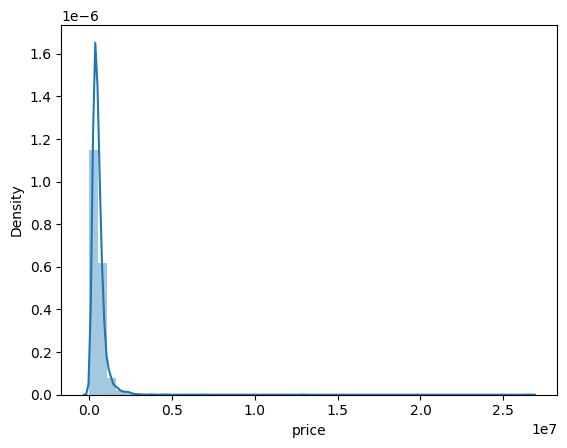

In [ ]:
#checking for outlier using distplot
sns.distplot(df['price'])

<Axes: ylabel='price'>

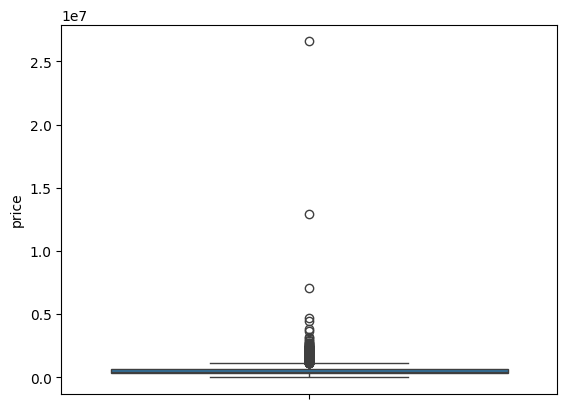

In [ ]:
# using boxplot to see the outliers more clearly
sns.boxplot(df['price'])

**Handling the outliers using the IQR (Interquartile Range) Method.**

In [ ]:
# First Quartile
q1 = df['price'].quantile(0.25)

# Third Quartile
q3 = df['price'].quantile(0.75)

# Inter Quartile Range
iqr = q3-q1

q1, q3, iqr

(326264.2857145, 657500.0, 331235.7142855)

In [ ]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

# values outside this range will be considered as outliers
lower_limit, upper_limit

(-170589.28571375, 1154353.57142825)

<Axes: ylabel='price'>

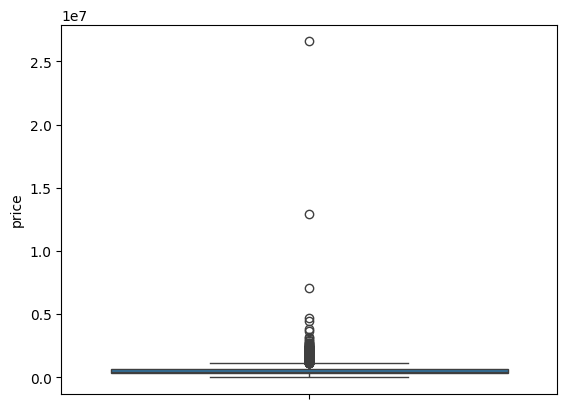

In [ ]:
# Before Handling Outliers
sns.boxplot(df['price'])

In [ ]:
# Capping - Changing the outlier values to upper (or) Lower Limit values

#removing the outliers
df = df[(df['price'] <= upper_limit) & (df['price'] >= lower_limit)]


Using the upper and lower limits, I dropped the outliers instead of capping them. Removing outliers entirely from the dataset might lead to a loss of valuable information, but it ensures more accurate predictions by reducing the influence of extreme values.

<Axes: ylabel='price'>

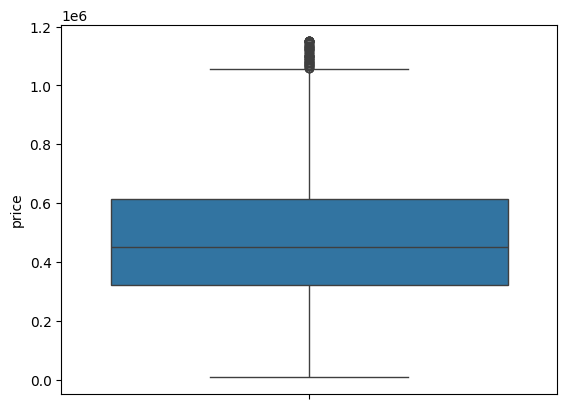

In [ ]:
# After Handling Outliers
sns.boxplot(df['price'])

<ipython-input-307-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

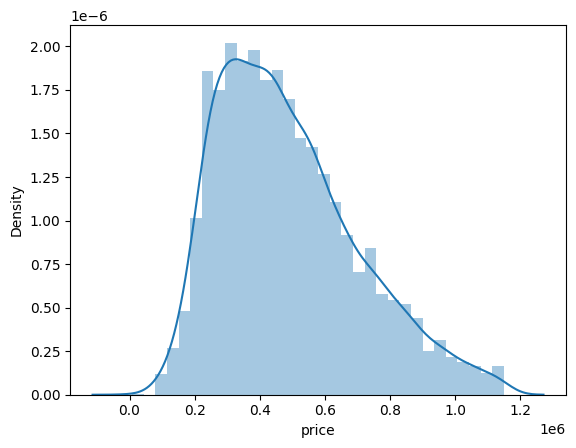

In [ ]:
sns.distplot(df['price'])


In [ ]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 313000.00         3          1         1340      7912       1           0   
2 342000.00         3          2         1930     11947       1           0   
3 420000.00         3          2         2000      8030       1           0   
4 550000.00         4          2         1940     10500       1           0   
5 490000.00         2          1          880      6380       1           0   

   view  condition  sqft_above  sqft_basement  yr_renovated  \
0     0          3        1340              0          2005   
2     0          4        1930              0             0   
3     0          4        1000           1000             0   
4     0          4        1140            800          1992   
5     0          3         880              0          1994   

                     street       city  statezip  age  years_since_renovation  
0      18810 Densmore Ave N  Shoreline  WA 98133   59                       9  
2  26206-26214 143rd Ave SE       Kent  WA 98042   48                       0  
3           857 170th Pl NE   Bellevue  WA 98008   51                       0  
4         9105 170th Ave NE    Redmond  WA 98052   38                      22  
5            522 NE 88th St    Seattle  WA 98115   76                      20

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4311 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   4311 non-null   float64
 1   bedrooms                4311 non-null   int64  
 2   bathrooms               4311 non-null   int64  
 3   sqft_living             4311 non-null   int64  
 4   sqft_lot                4311 non-null   int64  
 5   floors                  4311 non-null   int64  
 6   waterfront              4311 non-null   int64  
 7   view                    4311 non-null   int64  
 8   condition               4311 non-null   int64  
 9   sqft_above              4311 non-null   int64  
 10  sqft_basement           4311 non-null   int64  
 11  yr_renovated            4311 non-null   int64  
 12  street                  4311 non-null   object 
 13  city                    4311 non-null   object 
 14  statezip                4311 non-null   objec

In [ ]:
df.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
count    4311.00   4311.00    4311.00      4311.00    4311.00 4311.00   
mean   487456.90      3.35       1.72      2030.70   14598.60    1.44   
std    215659.64      0.88       0.68       810.14   36141.11    0.55   
min      7800.00      0.00       0.00       370.00     638.00    1.00   
25%    320000.00      3.00       1.00      1430.00    5000.00    1.00   
50%    450000.00      3.00       2.00      1920.00    7566.00    1.00   
75%    615000.00      4.00       2.00      2510.00   10696.50    2.00   
max   1150000.00      9.00       5.00      7320.00 1074218.00    3.00   

       waterfront    view  condition  sqft_above  sqft_basement  yr_renovated  \
count     4311.00 4311.00    4311.00     4311.00        4311.00       4311.00   
mean         0.00    0.17       3.44     1747.01         283.69        810.58   
std          0.06    0.64       0.67      763.54         422.53        979.84   
min          0.00    0.00       1.00      370.00           0.00          0.00   
25%          0.00    0.00       3.00     1170.00           0.00          0.00   
50%          0.00    0.00       3.00     1540.00           0.00          0.00   
75%          0.00    0.00       4.00     2190.00         560.00       1999.00   
max          1.00    4.00       5.00     7320.00        2300.00       2014.00   

          age  years_since_renovation  
count 4311.00                 4311.00  
mean    43.12                    7.91  
std     29.51                   16.61  
min      0.00                    0.00  
25%     18.00                    0.00  
50%     38.00                    0.00  
75%     63.00                   11.00  
max    114.00                  102.00

## **Checking out the distributions of categorical data/variables against price to get insights:**

### Bedrooms vs Price


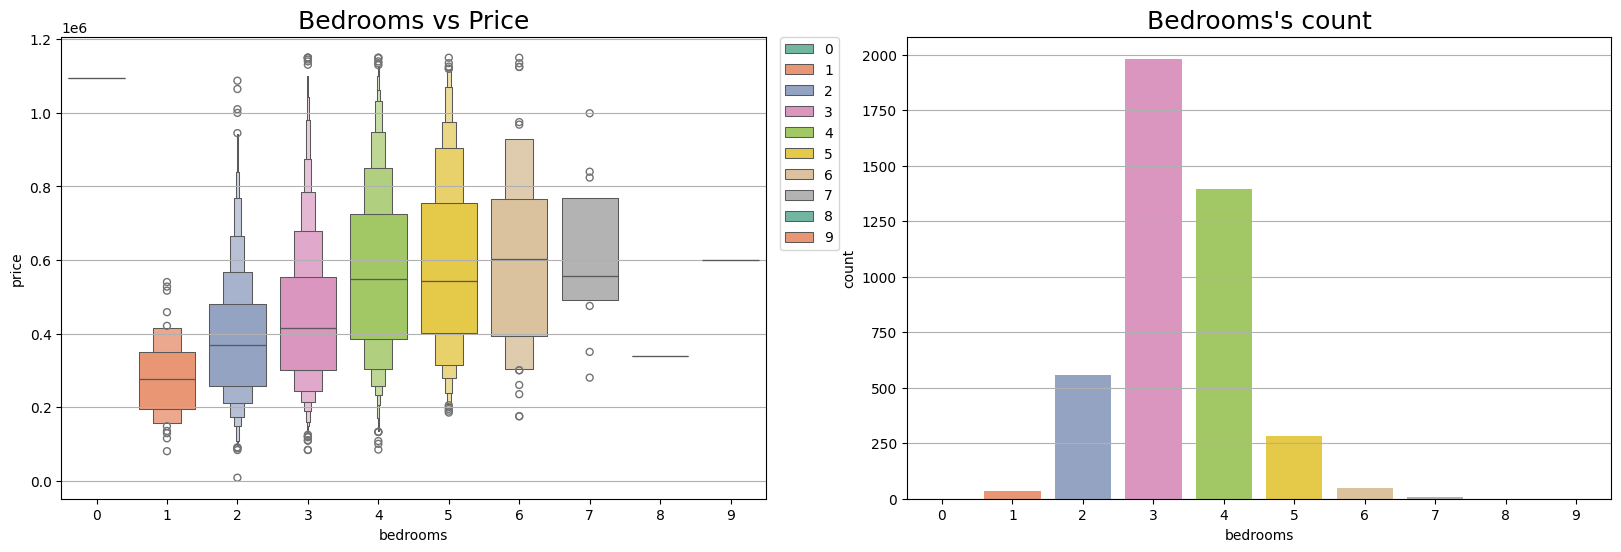

In [ ]:
plt.figure(figsize=(20, 6))

# Boxen plot for bedrooms vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='bedrooms', y='price', hue='bedrooms', palette='Set2')
ax.set_title('Bedrooms vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Countplot for bedrooms
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['bedrooms'], hue=df['bedrooms'], palette='Set2', legend=False)
ax.set_title('Bedrooms\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 0 to 9 bedrooms.
- The majority of the houses in the dataset have 3 bedrooms.
- The number of bedrooms directly affects the price of a house.
- The price is highest when the number of bedrooms is 0 and there is only 1 instance of it.

### Bathrooms vs Price


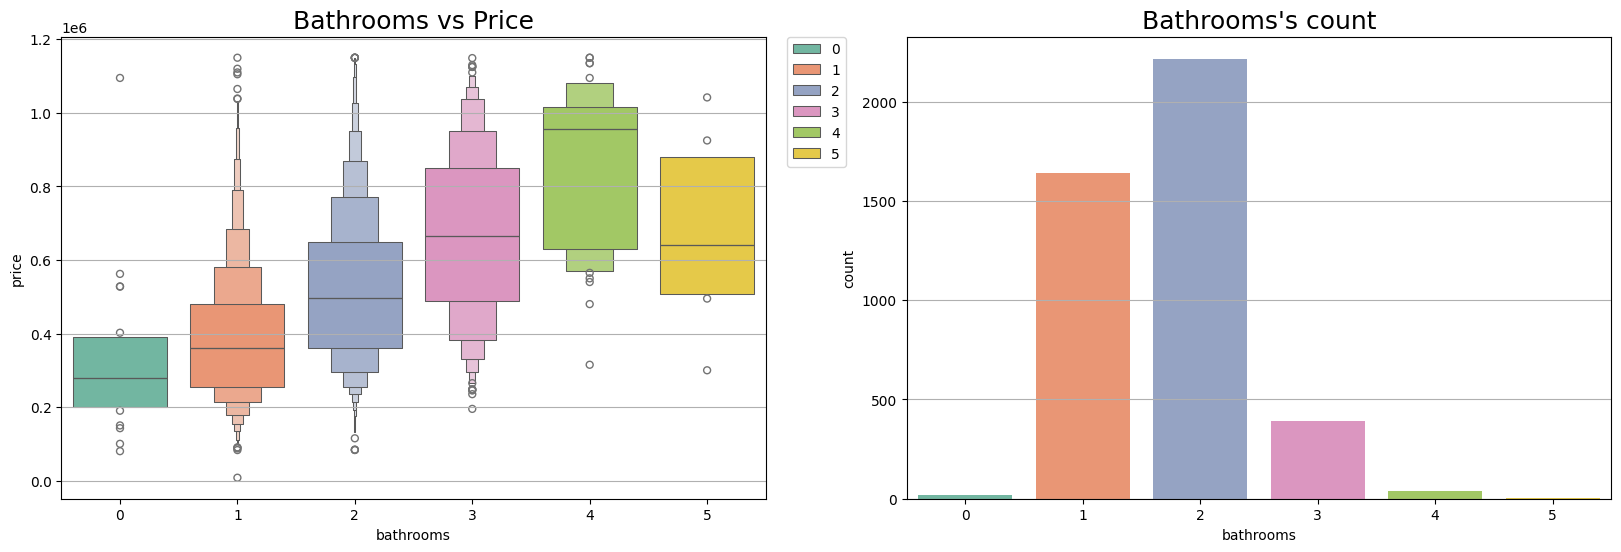

In [ ]:
plt.figure(figsize=(20, 6))

# Boxen plot for bathrooms vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='bathrooms', y='price', hue='bathrooms', palette='Set2')
ax.set_title('Bathrooms vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for bathrooms
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['bathrooms'], hue=df['bathrooms'], palette='Set2', legend=False)
ax.set_title('Bathrooms\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 0 to 5 bathrooms.
- The majority of the houses in the dataset have 2 bathrooms.
- The number of bathrooms directly affects the price of a house.

### Floors vs Price


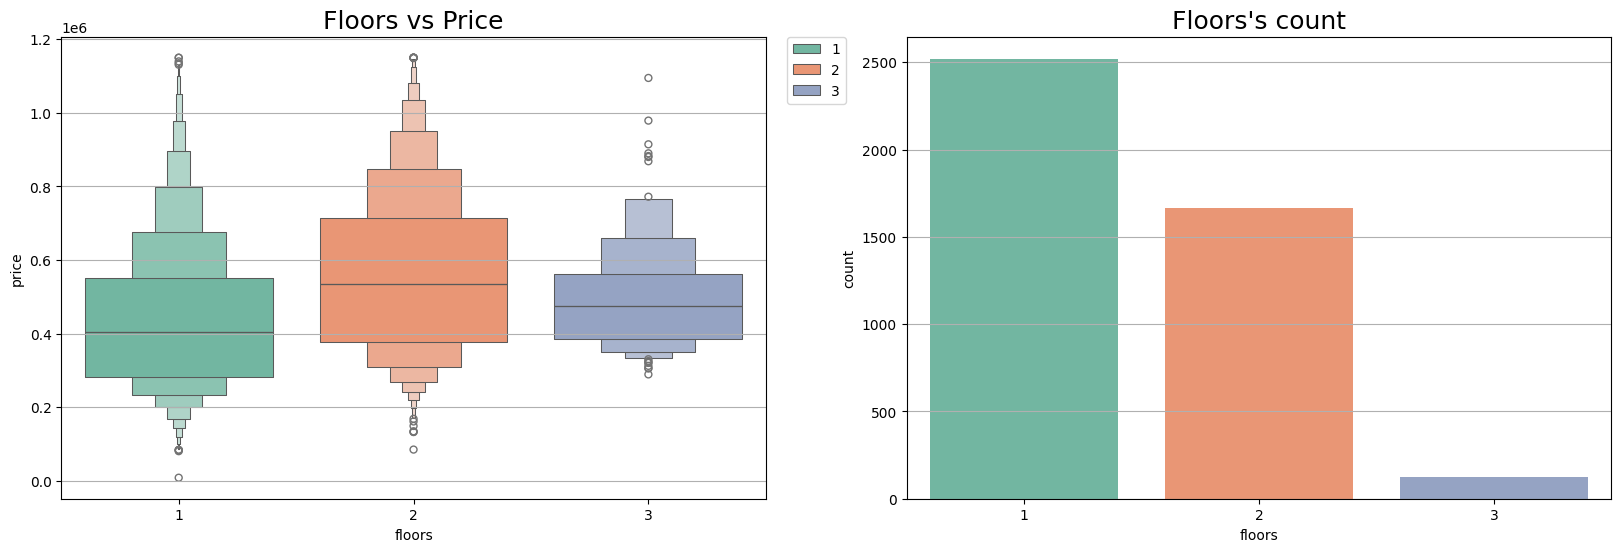

In [ ]:
plt.figure(figsize=(20, 6))

# Boxen plot for floors vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='floors', y='price', hue='floors', palette='Set2')
ax.set_title('Floors vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for floors
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['floors'], hue=df['floors'], palette='Set2', legend=False)
ax.set_title('Floors\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- All the houses in the dataset have 1 to 3 floors.
- The majority of the houses in the dataset have 1 floor.
- The prices of the majority of houses with 2 floors are higher than those with 1 or 3 floors.

### Waterfront vs Price


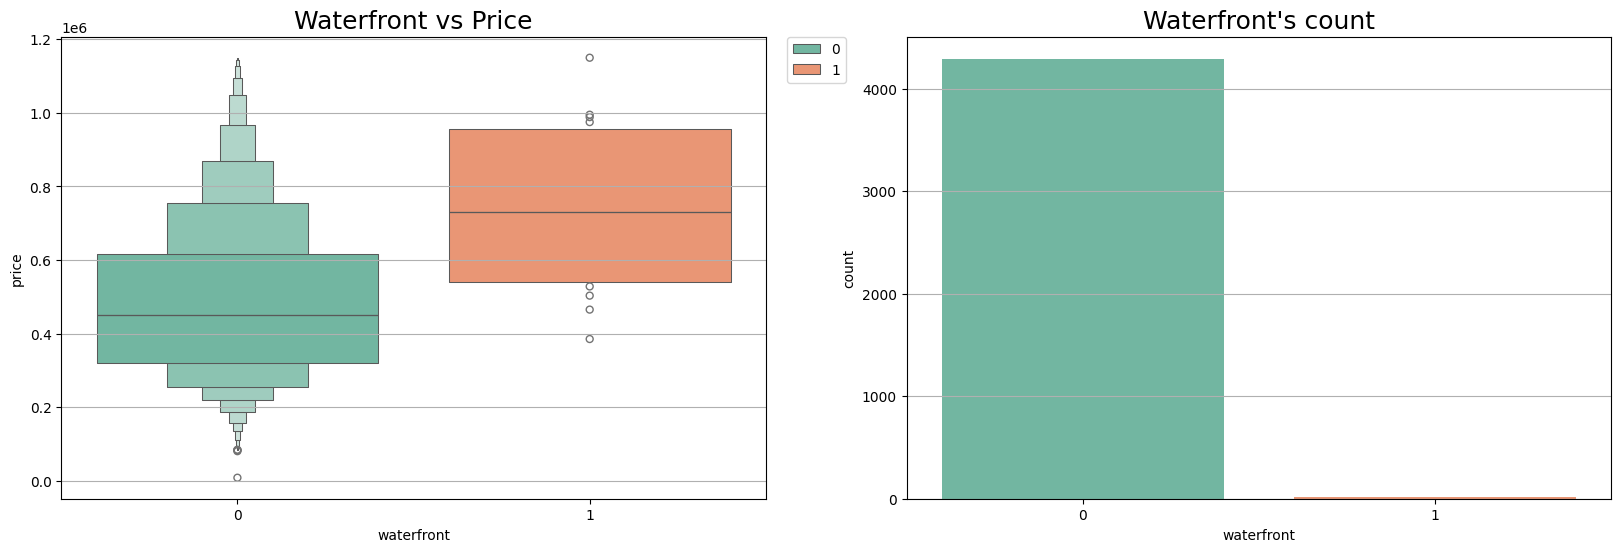

In [ ]:
plt.figure(figsize=(20, 6))

# Boxen plot for waterfront vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='waterfront', y='price', hue='waterfront', palette='Set2')
ax.set_title('Waterfront vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for waterfront
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['waterfront'], hue=df['waterfront'], palette='Set2', legend=False)
ax.set_title('Waterfront\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses don't have a waterfront.
- The prices of houses with waterfront are higher than the ones without a waterfront.

### View vs Price


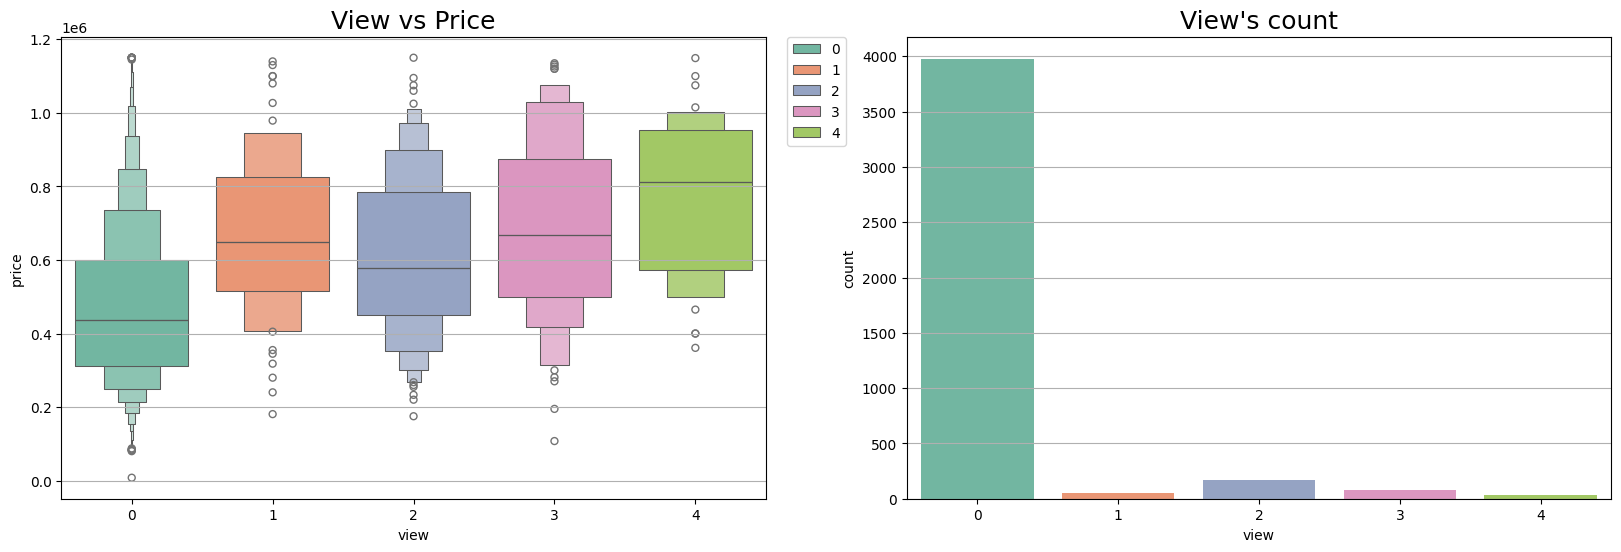

In [ ]:
plt.figure(figsize=(20, 6))

# Boxen plot for view vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='view', y='price', hue='view', palette='Set2')
ax.set_title('View vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for view
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['view'], hue=df['view'], palette='Set2', legend=False)
ax.set_title('View\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses don't have a view.
- The prices of houses with 1 or more views are higher than the ones without a view.

### Condition vs Price


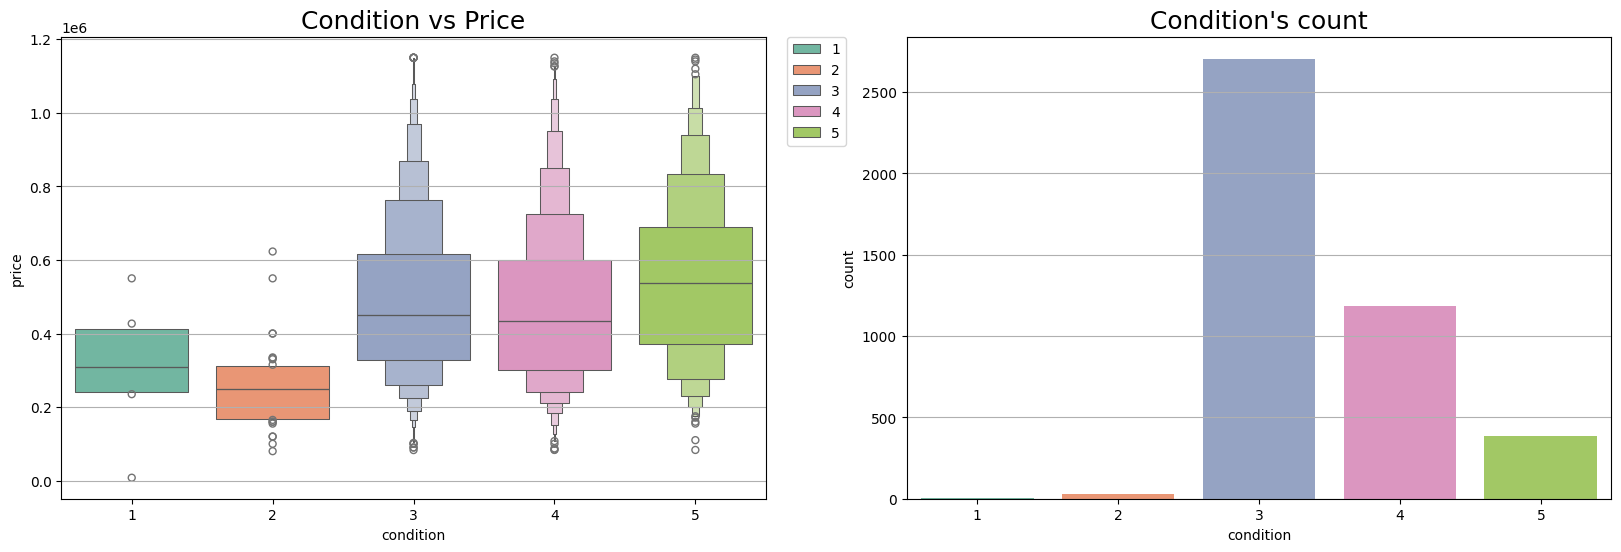

In [ ]:
plt.figure(figsize=(20, 6))

# Boxen plot for condition vs price
plt.subplot(1, 2, 1)
plt.grid(True)
ax = sns.boxenplot(data=df, x='condition', y='price', hue='condition', palette='Set2')
ax.set_title('Condition vs Price', fontdict={'fontsize': 18})
ax.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# Countplot for condition
plt.subplot(1, 2, 2)
plt.grid(True)
ax = sns.countplot(x=df['condition'], hue=df['condition'], palette='Set2', legend=False)
ax.set_title('Condition\'s count', fontdict={'fontsize': 18})

plt.show()

**Insights:**
- Most of the houses have condition rating 3
- The highest average price belongs to houses with condition rating 5.
- The lowest average price belongs to houses with condition rating 2.

## **Pairplot for numerical data/variables:**

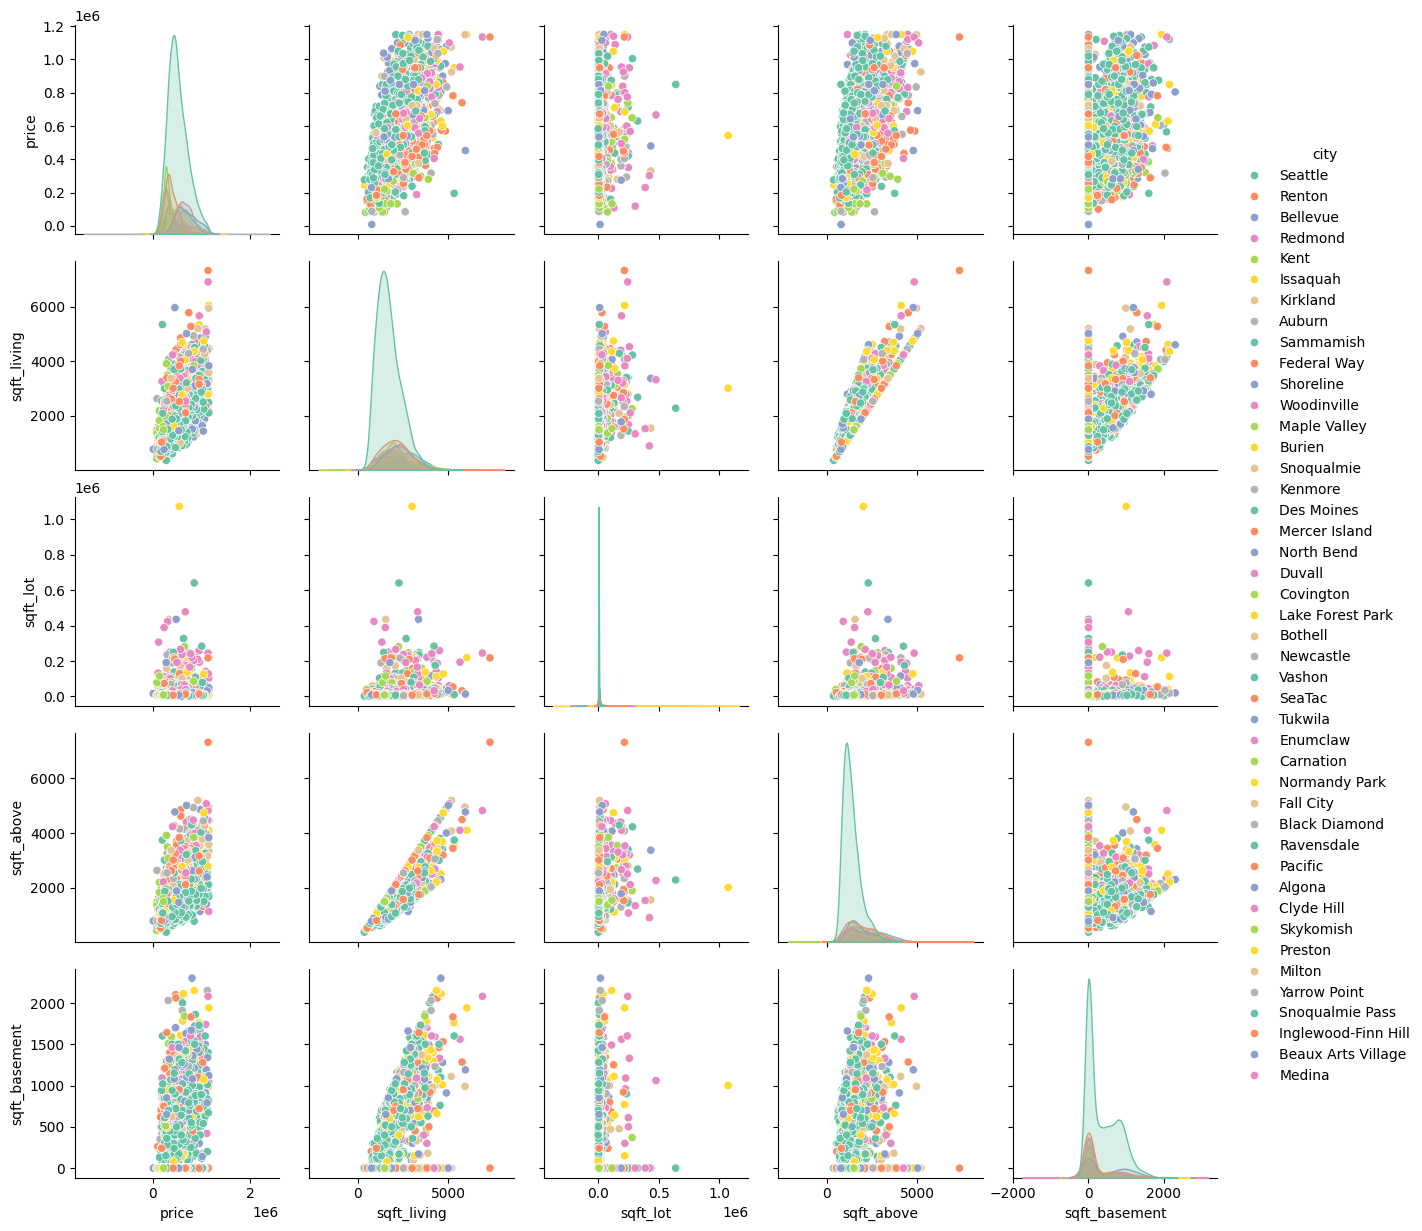

In [ ]:
# Numerical variables for pairplot
df_Numerical_Variables = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'city']]

# Calculate city value counts and sort in descending order
city_counts = df['city'].value_counts().sort_values(ascending=False)

# Get ordered city names
ordered_city_names = city_counts.index

# Creating the pairplot with hue as city
sns.pairplot(df_Numerical_Variables, hue='city', hue_order=ordered_city_names, palette='Set2')
plt.show()

In [ ]:
len(df['city'].value_counts())

44

In [ ]:
df['city'].value_counts()

city
Seattle                1461
Renton                  291
Bellevue                232
Redmond                 227
Kent                    183
Issaquah                183
Kirkland                176
Auburn                  175
Sammamish               166
Federal Way             145
Shoreline               121
Woodinville             111
Maple Valley             95
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
Mercer Island            50
North Bend               50
Duvall                   42
Covington                41
Lake Forest Park         34
Bothell                  33
Newcastle                31
Vashon                   29
SeaTac                   28
Tukwila                  28
Enumclaw                 27
Carnation                21
Normandy Park            16
Fall City                 9
Black Diamond             8
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill     

**Insights:**
- The dataset contains housing data from **44** different cities.
- Most of the house data is from **Seattle**.
- Most of the houses in **Seattle** have the highest price.

## **Creating copies of Main DF for comparison**

The objective is to compare the performance of models with and without location attributes. In order to evaluate I will be doing four different models for each algorithm using different data frames:

1. Housing data of **multiple** cities **with** location atributes.

2. Housing data of **multiple** cities **with** location atributes, **except Street**.

3. Housing data of **multiple** cities **without** location atributes (only structural attributes).

4. Housing data of **one** city **with** location atributes.

5. Housing data of **one** city **with** location atributes, **except Street**.

6. Housing data of **one** city **without** location atributes (only structural attributes).

I selected **Seattle** city, as it has the majority of the data compared to other cities in the dataset. Making it a suitable City for Housing data of one city with and without location atributes.

 **Creating a copy of Df with Seattle only:**

In [ ]:
df['city'].value_counts()

city
Seattle                1461
Renton                  291
Bellevue                232
Redmond                 227
Kent                    183
Issaquah                183
Kirkland                176
Auburn                  175
Sammamish               166
Federal Way             145
Shoreline               121
Woodinville             111
Maple Valley             95
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
Mercer Island            50
North Bend               50
Duvall                   42
Covington                41
Lake Forest Park         34
Bothell                  33
Newcastle                31
Vashon                   29
SeaTac                   28
Tukwila                  28
Enumclaw                 27
Carnation                21
Normandy Park            16
Fall City                 9
Black Diamond             8
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill     

In [ ]:
seattle_df = df.copy()
seattle_df = seattle_df[seattle_df['city'] == 'Seattle']
#dropping the city column as now everything is Seattle (it doesn't affect predictive power)
seattle_df = seattle_df.drop(['city'], axis=1)
seattle_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5    490000.00         2          1          880      6380       1   
9    640000.00         4          2         1520      6200       1   
13   365000.00         3          1         1090      6435       1   
20   750000.00         3          1         2240     10578       2   
22   626000.00         3          2         1750      1572       2   
...        ...       ...        ...          ...       ...     ...   
4582 406062.50         2          1         1290      4650       1   
4585 486895.00         3          1         1890      3330       1   
4591 396166.67         3          1         1880      5752       1   
4595 308166.67         3          1         1510      6360       1   
4598 203400.00         4          2         2090      6630       1   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
5              0     0          3         880              0          1994   
9              0     0          3        1520              0          2010   
13             0     0          4        1090              0          2009   
20             0     0          5        1550            690             0   
22             0     0          3        1470            280             0   
...          ...   ...        ...         ...            ...           ...   
4582           0     0          4        1290              0          1990   
4585           0     0          4        1390            500             0   
4591           0     0          4         940            940             0   
4595           0     0          4        1510              0          1979   
4598           0     0          3        1070           1020             0   

                   street  statezip  age  years_since_renovation  
5          522 NE 88th St  WA 98115   76                      20  
9        6811 55th Ave NE  WA 98115   69                       4  
13    2504 SW Portland Ct  WA 98106   59                       5  
20        3225 NE 92nd St  WA 98115   91                       0  
22    3140 Franklin Ave E  WA 98102    9                       0  
...                   ...       ...  ...                     ...  
4582       312 NE 81st St  WA 98115  108                      24  
4585    4324 Dayton Ave N  WA 98103  113                       0  
4591   3529 SW Webster St  WA 98126   69                       0  
4595       501 N 143rd St  WA 98133   60                      35  
4598    5148 S Creston St  WA 98178   40                       0  

[1461 rows x 16 columns]

## **Encoding Strings to Categorized Values**

I'm using **MEstimateEncoder** because it's a powerful encoding technique that captures the relationship between categorical variables and the target variable. By considering the mean target value of each category and applying smoothing, MEstimateEncoder provides robust encoding, particularly useful for categorical variables with a large number of categories or imbalanced distributions.

For some reason the library is not installed by default, so I'm installing the library **category_encorders** to access **MEstimateEncoder**

In [ ]:
pip install category_encoders

### **Encoding Main DF**

In [ ]:
#for main df
from category_encoders import MEstimateEncoder

# Initializing MEstimateEncoder for the specified columns
encoder = MEstimateEncoder(cols=['street', 'city', 'statezip'], m=0.5)

# Fitting the encoder to the data
encoder.fit(df[['street', 'city', 'statezip']], df['price'])

# Transforming the categorical columns
df[['street', 'city', 'statezip']] = encoder.transform(df[['street', 'city', 'statezip']])
df

<ipython-input-323-5ffecac8e45e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['street', 'city', 'statezip']] = encoder.transform(df[['street', 'city', 'statezip']])


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    313000.00         3          1         1340      7912       1   
2    342000.00         3          2         1930     11947       1   
3    420000.00         3          2         2000      8030       1   
4    550000.00         4          2         1940     10500       1   
5    490000.00         2          1          880      6380       1   
...        ...       ...        ...          ...       ...     ...   
4595 308166.67         3          1         1510      6360       1   
4596 534333.33         3          2         1460      7573       2   
4597 416904.17         3          2         3010      7014       2   
4598 203400.00         4          2         2090      6630       1   
4599 220600.00         3          2         1490      8102       2   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
0              0     0          3        1340              0          2005   
2              0     0          4        1930              0             0   
3              0     0          4        1000           1000             0   
4              0     0          4        1140            800          1992   
5              0     0          3         880              0          1994   
...          ...   ...        ...         ...            ...           ...   
4595           0     0          4        1510              0          1979   
4596           0     0          3        1460              0          2009   
4597           0     0          3        3010              0             0   
4598           0     0          3        1070           1020             0   
4599           0     0          4        1490              0             0   

        street      city  statezip  age  years_since_renovation  
0    371152.30 396806.50 375037.64   59                       9  
2    390485.63 299508.61 308392.05   48                       0  
3    442485.63 681126.17 545535.90   51                       0  
4    529152.30 639739.43 624522.48   38                      22  
5    489152.30 509343.26 571408.73   76                      20  
...        ...       ...       ...  ...                     ...  
4595 367930.08 509343.26 375037.64   60                      35  
4596 518707.86 681126.17 638393.65   31                       5  
4597 440421.75 379817.26 485990.81    5                       0  
4598 298085.63 509343.26 277377.66   40                       0  
4599 309552.30 259800.86 308392.05   24                       0  

[4311 rows x 17 columns]

### **Encoding Seattle DF**

In [ ]:
# for seattle df
# Initializing MEstimateEncoder for the specified columns
encoder = MEstimateEncoder(cols=['street', 'statezip'], m=0.5)

# Fitting the encoder to the data
encoder.fit(seattle_df[['street', 'statezip']], seattle_df['price'])

# Transforming the categorical columns
seattle_df[['street', 'statezip',]] = encoder.transform(seattle_df[['street', 'statezip']])
seattle_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5    490000.00         2          1          880      6380       1   
9    640000.00         4          2         1520      6200       1   
13   365000.00         3          1         1090      6435       1   
20   750000.00         3          1         2240     10578       2   
22   626000.00         3          2         1750      1572       2   
...        ...       ...        ...          ...       ...     ...   
4582 406062.50         2          1         1290      4650       1   
4585 486895.00         3          1         1890      3330       1   
4591 396166.67         3          1         1880      5752       1   
4595 308166.67         3          1         1510      6360       1   
4598 203400.00         4          2         2090      6630       1   

      waterfront  view  condition  sqft_above  sqft_basement  yr_renovated  \
5              0     0          3         880              0          1994   
9              0     0          3        1520              0          2010   
13             0     0          4        1090              0          2009   
20             0     0          5        1550            690             0   
22             0     0          3        1470            280             0   
...          ...   ...        ...         ...            ...           ...   
4582           0     0          4        1290              0          1990   
4585           0     0          4        1390            500             0   
4591           0     0          4         940            940             0   
4595           0     0          4        1510              0          1979   
4598           0     0          3        1070           1020             0   

        street  statezip  age  years_since_renovation  
5    496450.25 571496.66   76                      20  
9    596450.25 571496.66   69                       4  
13   413116.92 298809.65   59                       5  
20   669783.58 571496.66   91                       0  
22   587116.92 639186.30    9                       0  
...        ...       ...  ...                     ...  
4582 440491.92 571496.66  108                      24  
4585 494380.25 561716.90  113                       0  
4591 433894.70 423742.44   69                       0  
4595 375228.03 382484.78   60                      35  
4598 305383.58 279412.32   40                       0  

[1461 rows x 16 columns]

## **Corr Heatmap**

### **For Main DF**

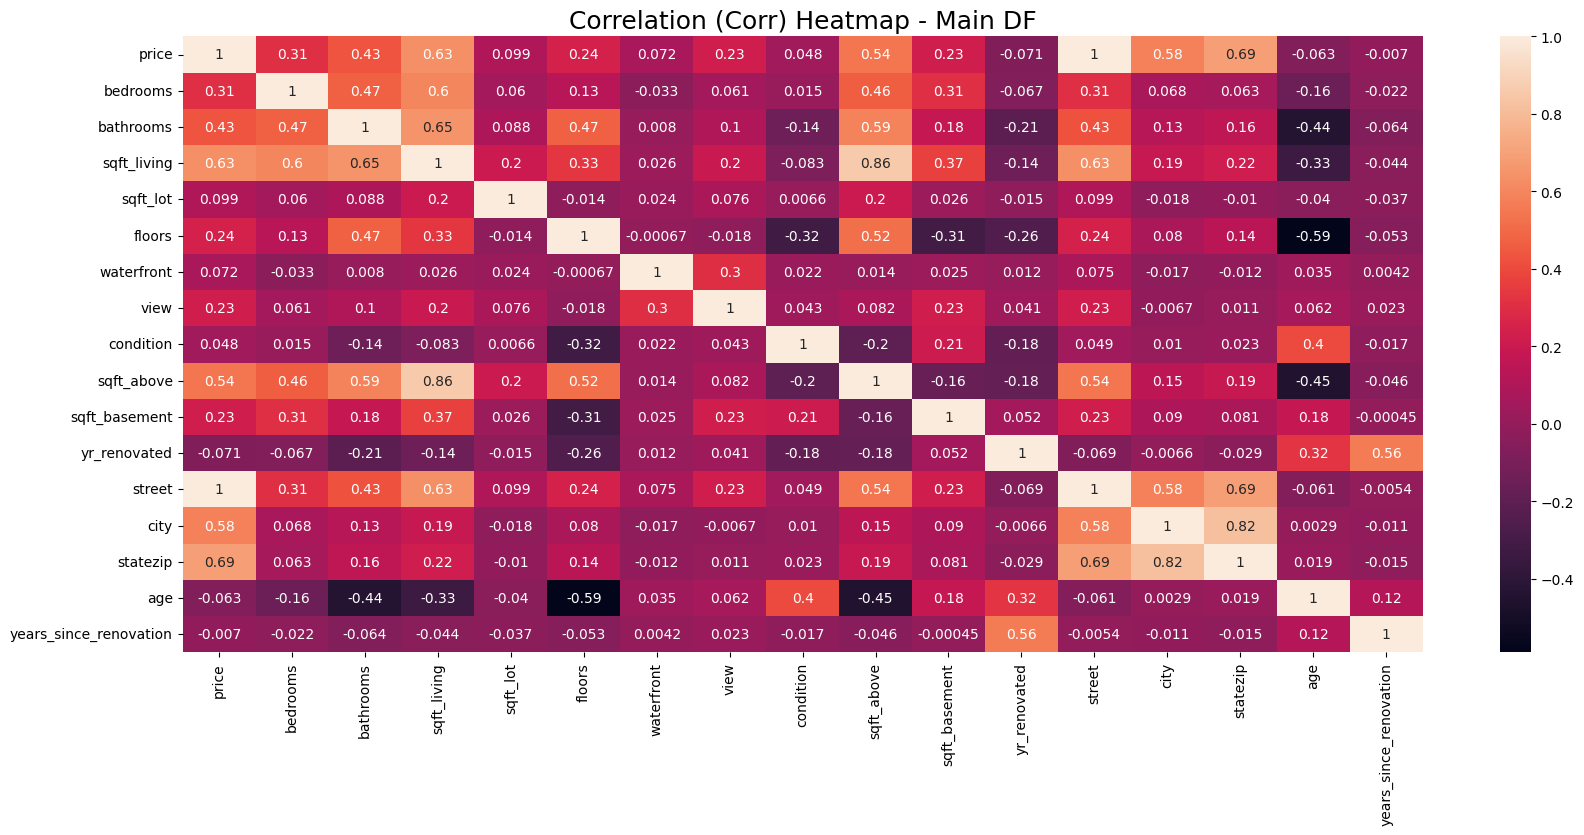

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('Correlation (Corr) Heatmap - Main DF', fontdict={'fontsize': 18})
plt.show()

### **For Seattle DF**

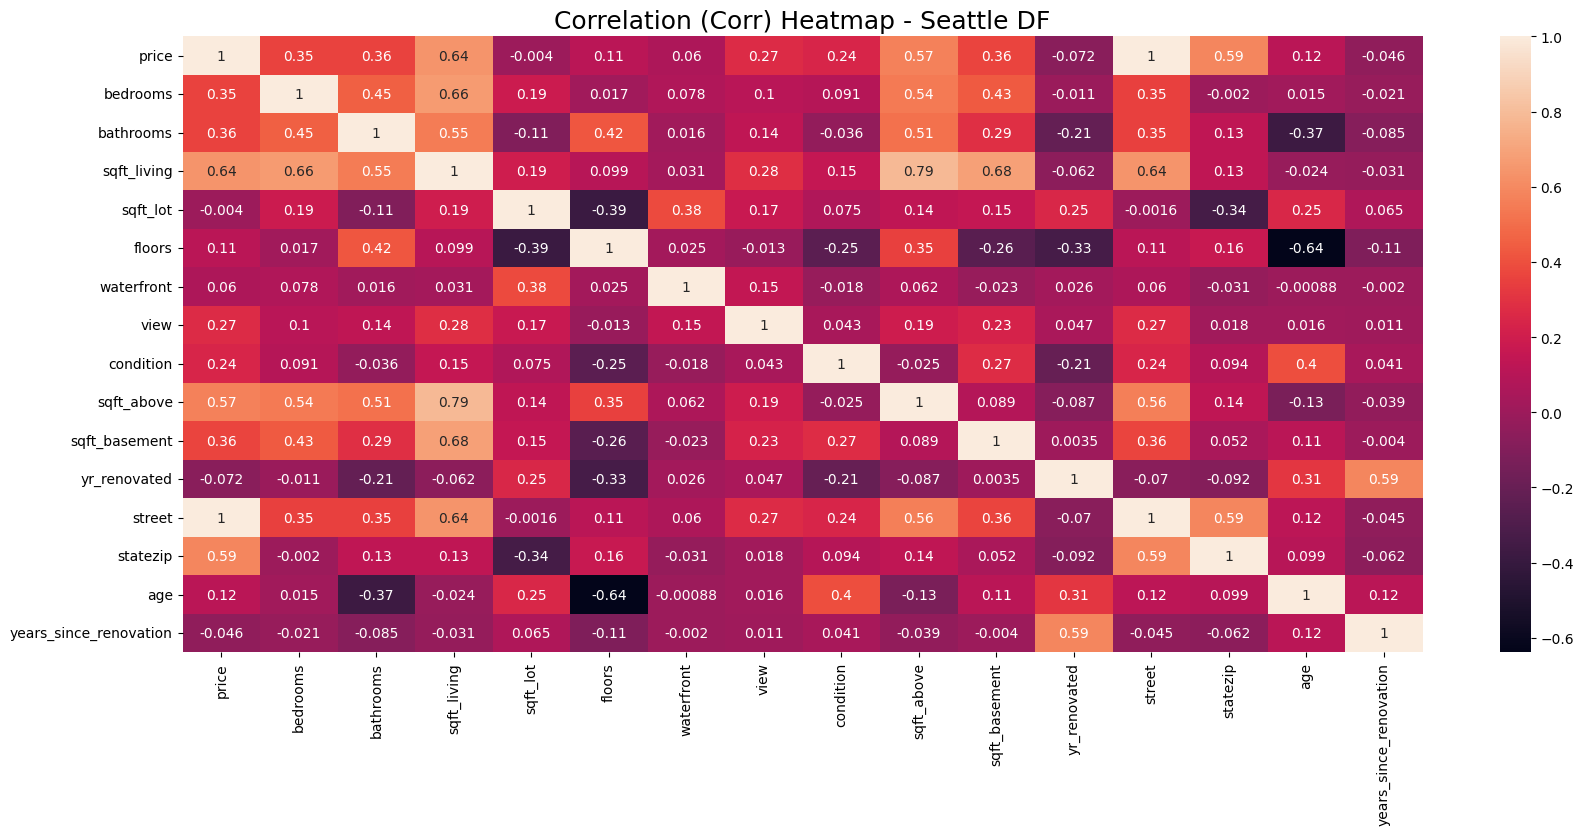

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.heatmap(seattle_df.corr(), annot=True)
ax.set_title('Correlation (Corr) Heatmap - Seattle DF', fontdict={'fontsize': 18})
plt.show()

# **The Machine Learning Models**

## **Linear Regression**

### **Linear Regression** - Multiple Cities Data **with** Location Attributes.

In [ ]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 16), (863, 16), (3448,), (863,))

In [ ]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Multi_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Multi_With_Location} seconds")

Elapsed time: 0.01950693130493164 seconds


In [ ]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Multi_With_Location = End_Time - Start_Time


MSE_Linear_Multi_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Multi_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Multi_With_Location = r2_score(y_test, predictions)


print('Linear Regression Model - Multiple Cities Data with location Atributes')
print(f'MSE: {MSE_Linear_Multi_With_Location:.4f}')
print(f'RMSE: {RMSE_Linear_Multi_With_Location:.4f}')
print(f'R2 Score: {R2_Linear_Multi_With_Location:.12f}')

Linear Regression Model - Multiple Cities Data with location Atributes
MSE: 99921436.4159
RMSE: 9996.0710
R2 Score: 0.997946517608


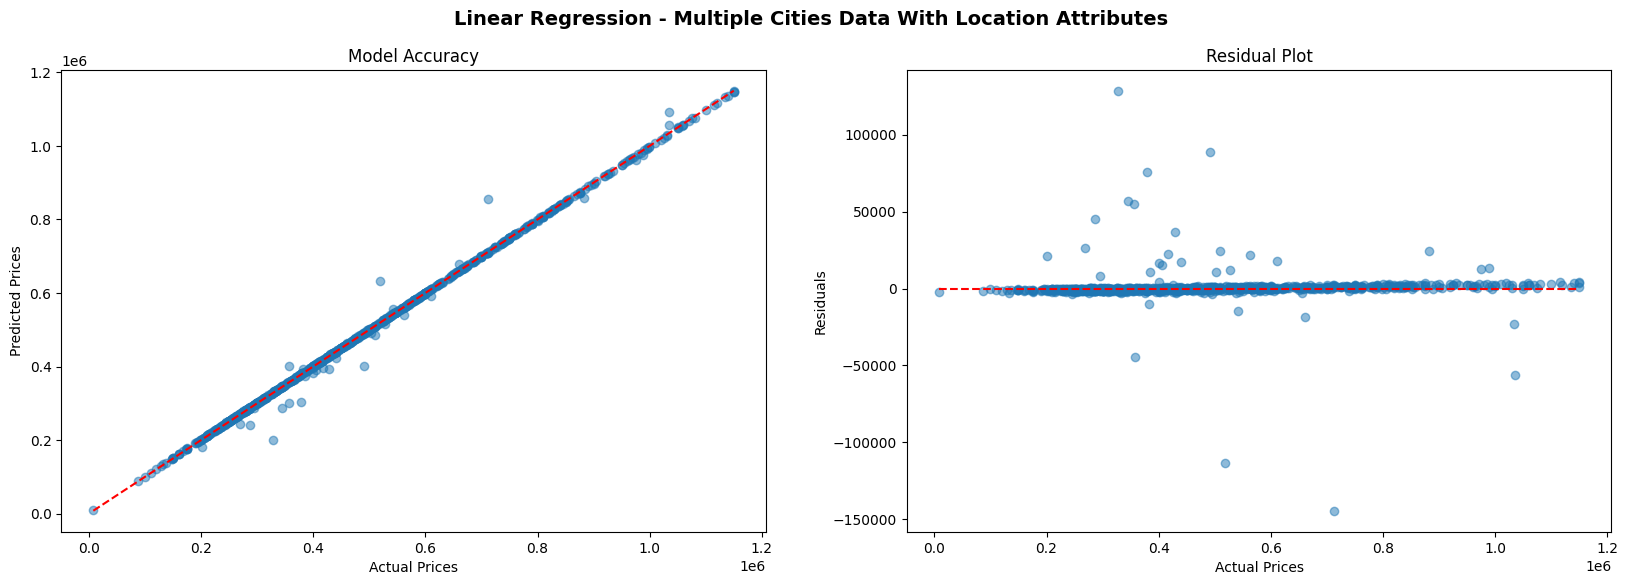

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Multiple Cities Data With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** - Multiple Cities Data **with** Location Attributes, except **Street**.

In [ ]:
Data_X = df.drop(columns=['price', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 15), (863, 15), (3448,), (863,))

In [ ]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Multi_Without_Street = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Multi_Without_Street} seconds")

Elapsed time: 0.01785755157470703 seconds


In [ ]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Multi_Without_Street = End_Time - Start_Time


MSE_Linear_Multi_Without_Street = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Multi_Without_Street = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Multi_Without_Street = r2_score(y_test, predictions)


print('Linear Regression Model - Multiple Cities Data with location Atributes, except Street')
print(f'MSE: {MSE_Linear_Multi_Without_Street:.4f}')
print(f'RMSE: {RMSE_Linear_Multi_Without_Street:.4f}')
print(f'R2 Score: {R2_Linear_Multi_Without_Street:.12f}')

Linear Regression Model - Multiple Cities Data with location Atributes, except Street
MSE: 10867574639.1518
RMSE: 104247.6601
R2 Score: 0.776660805055


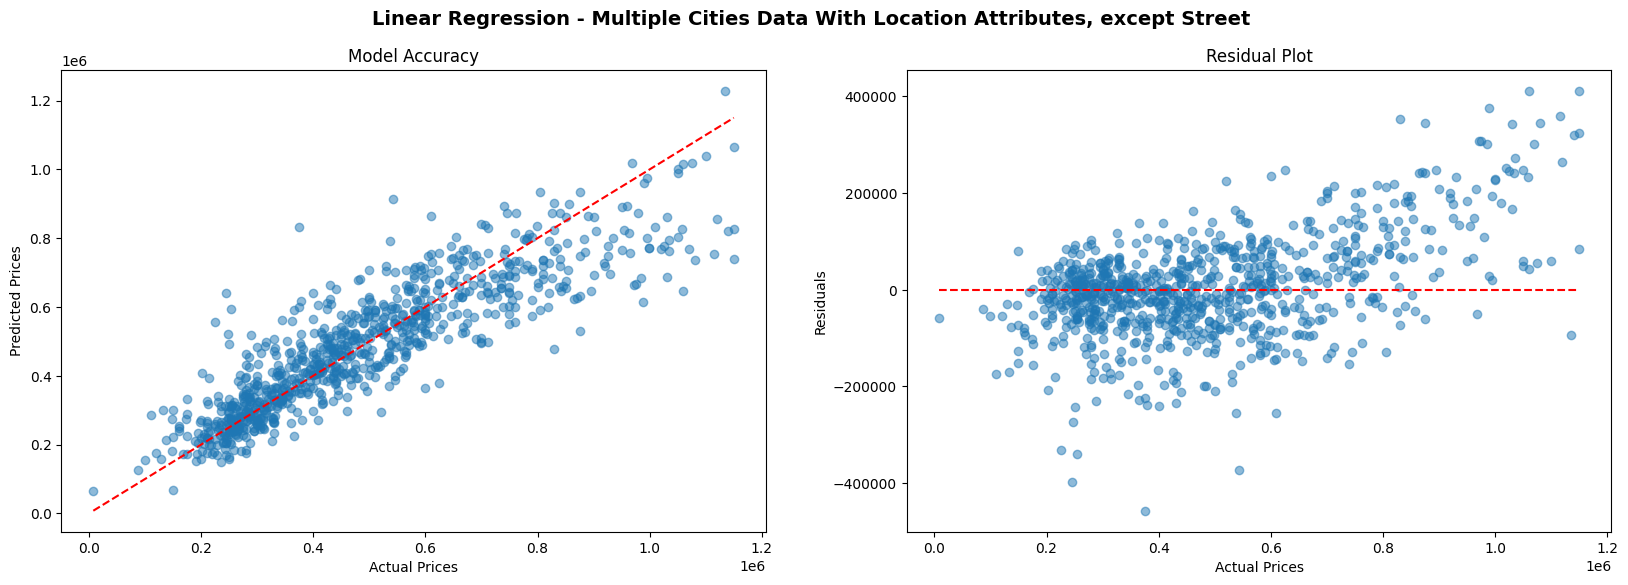

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Multiple Cities Data With Location Attributes, except Street', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** - Multiple Cities Data **without** Location Attributes.

In [ ]:
Data_X_Without_Location = df.drop(columns=['price', 'city', 'statezip', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 13), (863, 13), (3448,), (863,))

In [ ]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Multi_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Multi_Without_Location} seconds")

Elapsed time: 0.017220258712768555 seconds


In [ ]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Multi_Without_Location = End_Time - Start_Time

MSE_Linear_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Multi_Without_Location = r2_score(y_test, predictions)

print('Linear Regression Model - Multiple Cities Data without location Atributes')
print(f'MSE: {MSE_Linear_Multi_Without_Location:.4f}')
print(f'RMSE: {RMSE_Linear_Multi_Without_Location:.4f}')
print(f'R2 Score: {R2_Linear_Multi_Without_Location:.12f}')

Linear Regression Model - Multiple Cities Data without location Atributes
MSE: 23622201606.3864
RMSE: 153695.1580
R2 Score: 0.514540855271


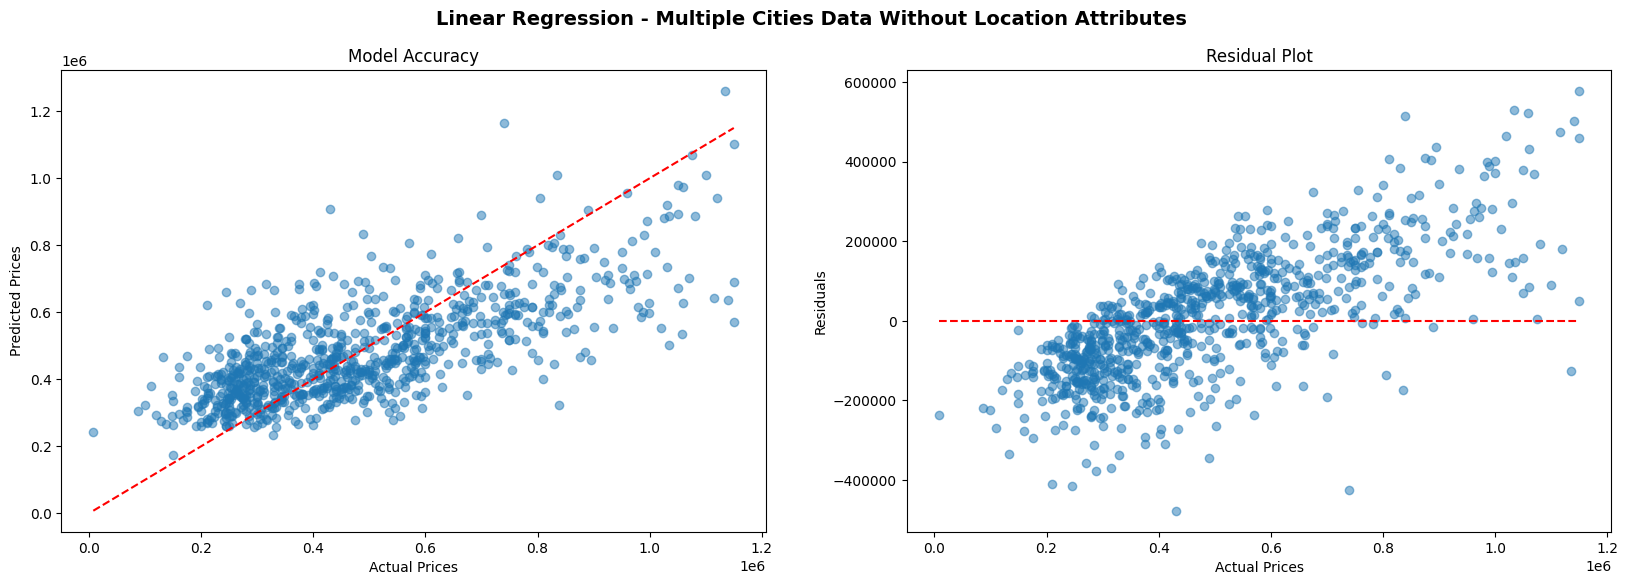

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Multiple Cities Data Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** - Seattle City Data **with** Location Attributes.

In [ ]:
Seattle_Data_X = seattle_df.drop(columns=['price'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 15), (293, 15), (1168,), (293,))

In [ ]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Seattle_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Seattle_With_Location} seconds")

Elapsed time: 0.013242244720458984 seconds


In [ ]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Seattle_With_Location = End_Time - Start_Time

MSE_Linear_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Seattle_With_Location = r2_score(y_test, predictions)

print('Linear Regression - Seattle City Data with Location Attributes.')
print(f'MSE: {MSE_Linear_Seattle_With_Location:.4f}')
print(f'RMSE: {RMSE_Linear_Seattle_With_Location:.4f}')
print(f'R2 Score: {R2_Linear_Seattle_With_Location:.12f}')

Linear Regression - Seattle City Data with Location Attributes.
MSE: 60235422.6520
RMSE: 7761.1483
R2 Score: 0.998225012063


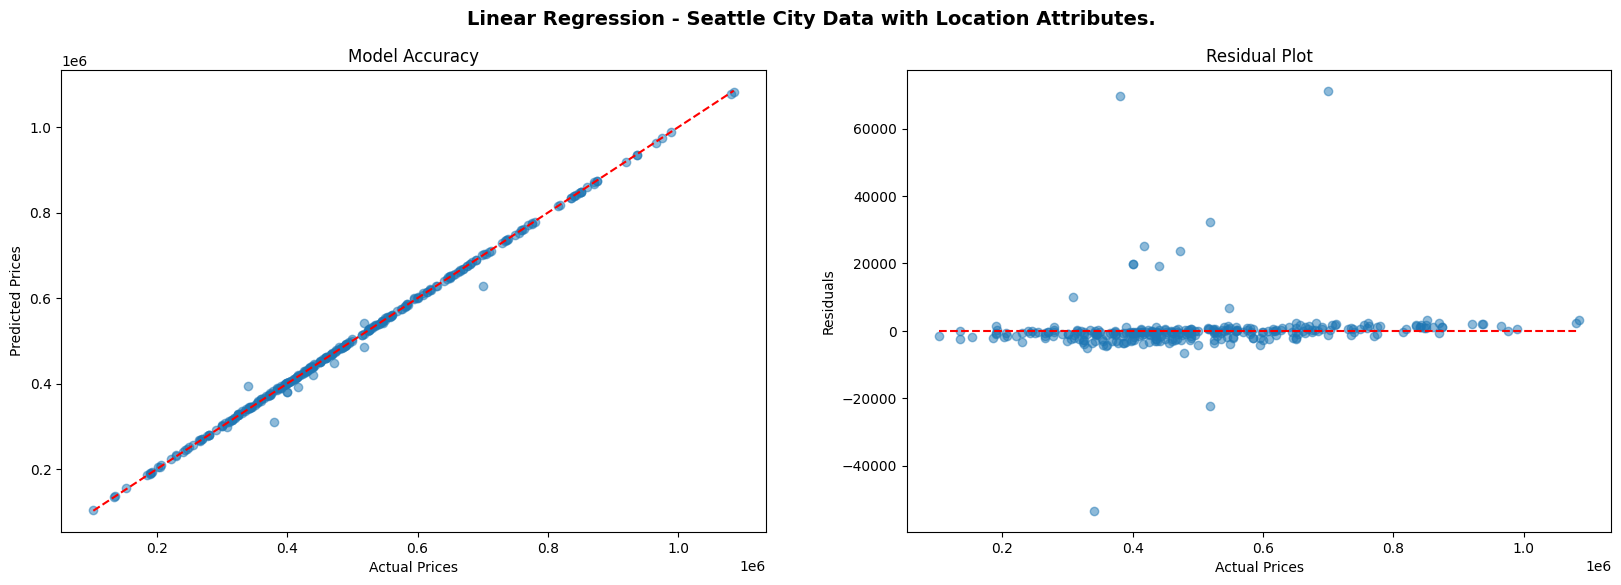

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Seattle City Data with Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** - Seattle City Data **with** Location Attributes, except **Street**.

In [ ]:
Seattle_Data_X = seattle_df.drop(columns=['price', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 14), (293, 14), (1168,), (293,))

In [ ]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Seattle_Without_Street = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Seattle_Without_Street} seconds")

Elapsed time: 0.006927013397216797 seconds


In [ ]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Seattle_Without_Street = End_Time - Start_Time

MSE_Linear_Seattle_Without_Street = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Seattle_Without_Street = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Seattle_Without_Street = r2_score(y_test, predictions)

print('Linear Regression - Seattle City Data with Location Attributes, except Street.')
print(f'MSE: {MSE_Linear_Seattle_Without_Street:.4f}')
print(f'RMSE: {RMSE_Linear_Seattle_Without_Street:.4f}')
print(f'R2 Score: {R2_Linear_Seattle_Without_Street:.12f}')

Linear Regression - Seattle City Data with Location Attributes, except Street.
MSE: 10115673153.1475
RMSE: 100576.7028
R2 Score: 0.701916297156


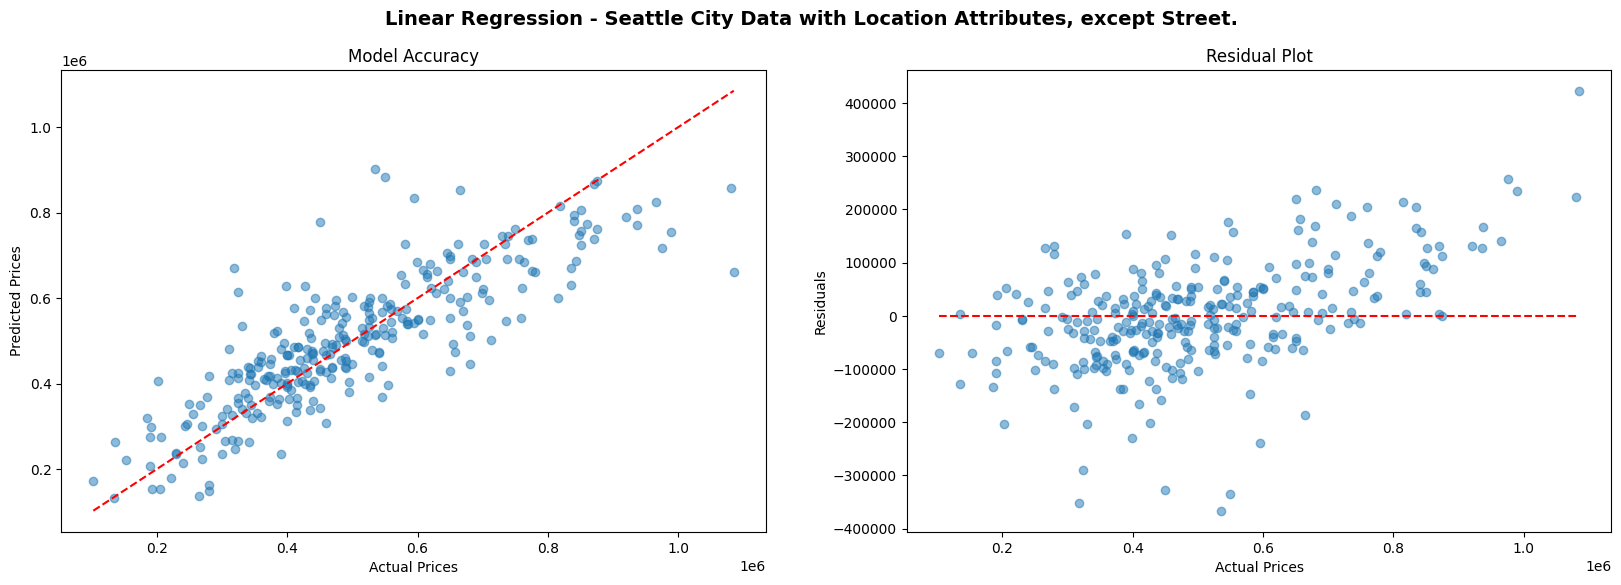

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Seattle City Data with Location Attributes, except Street.', fontsize=14, fontweight='bold')

plt.show()

### **Linear Regression** - Seattle City Data **without** Location Attributes.

In [ ]:
Seattle_Data_X_Without_Location = seattle_df.drop(columns=['price', 'statezip', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X_Without_Location, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 13), (293, 13), (1168,), (293,))

In [ ]:
#Fitting the dataset into the model
from sklearn.linear_model import LinearRegression

#Importing the model
lm = LinearRegression()

Start_Time = time.time()
lm.fit(X_train, y_train)
End_Time = time.time()

Training_Time_LR_Seattle_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_LR_Seattle_Without_Location} seconds")

Elapsed time: 0.010362863540649414 seconds


In [ ]:
Start_Time = time.time()
predictions = lm.predict(X_test)
End_Time = time.time()
Prediction_Time_LR_Seattle_Without_Location = End_Time - Start_Time

MSE_Linear_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_Linear_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_Linear_Seattle_Without_Location = r2_score(y_test, predictions)

print('Linear Regression - Seattle City Data without Location Attributes.')
print(f'MSE: {MSE_Linear_Seattle_Without_Location:.4f}')
print(f'RMSE: {RMSE_Linear_Seattle_Without_Location:.4f}')
print(f'R2 Score: {R2_Linear_Seattle_Without_Location:.12f}')

Linear Regression - Seattle City Data without Location Attributes.
MSE: 16376678176.9828
RMSE: 127971.3959
R2 Score: 0.517420067121


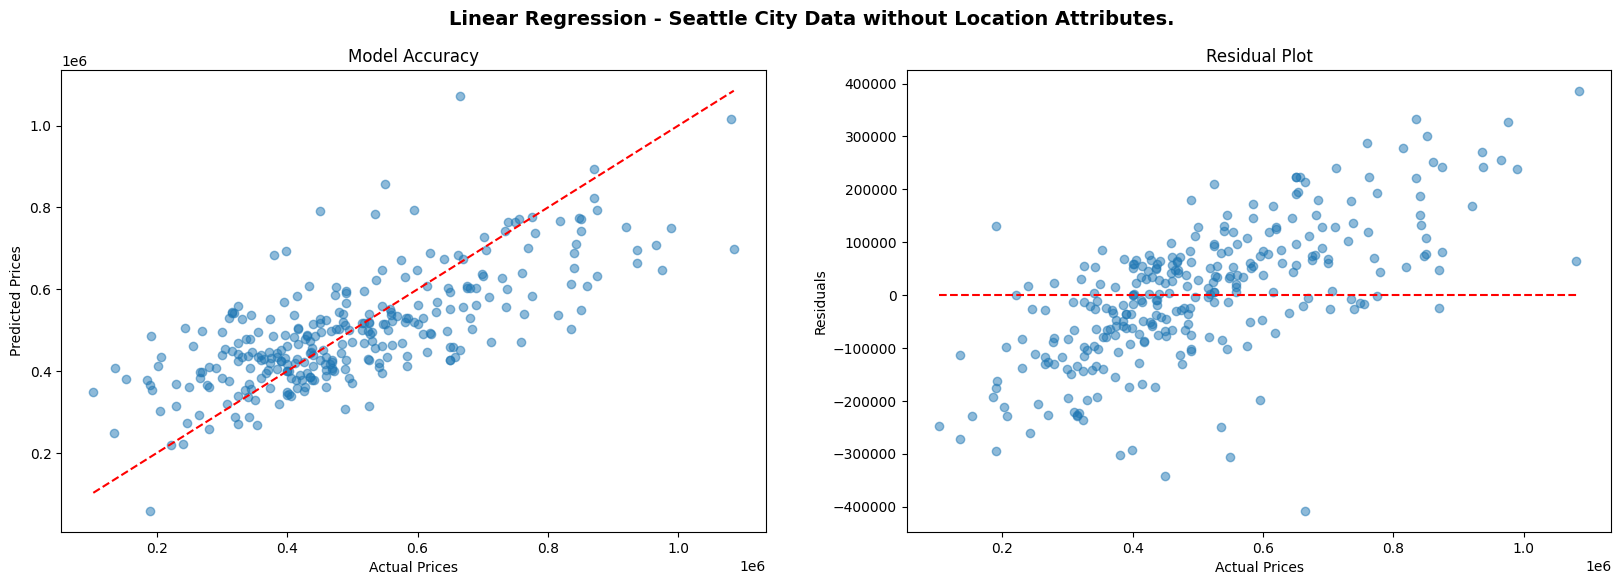

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Linear Regression - Seattle City Data without Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

## **Support Vector Regression (SVR)**

### **SVR** - Multiple Cities Data **with** Location Attributes.

In [ ]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']


# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 16), (863, 16), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Multi_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Multi_With_Location} seconds")

Elapsed time: 570.9648447036743 seconds


In [ ]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Multi_With_Location = End_Time - Start_Time

MSE_SVR_Multi_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_SVR_Multi_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_SVR_Multi_With_Location = r2_score(y_test, predictions)

print('Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes')
print(f'MSE: {MSE_SVR_Multi_With_Location:.4f}')
print(f'RMSE: {RMSE_SVR_Multi_With_Location:.4f}')
print(f'R2 Score: {R2_SVR_Multi_With_Location:.12f}')

Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes
MSE: 7500404014.0884
RMSE: 86604.8729
R2 Score: 0.845859425871


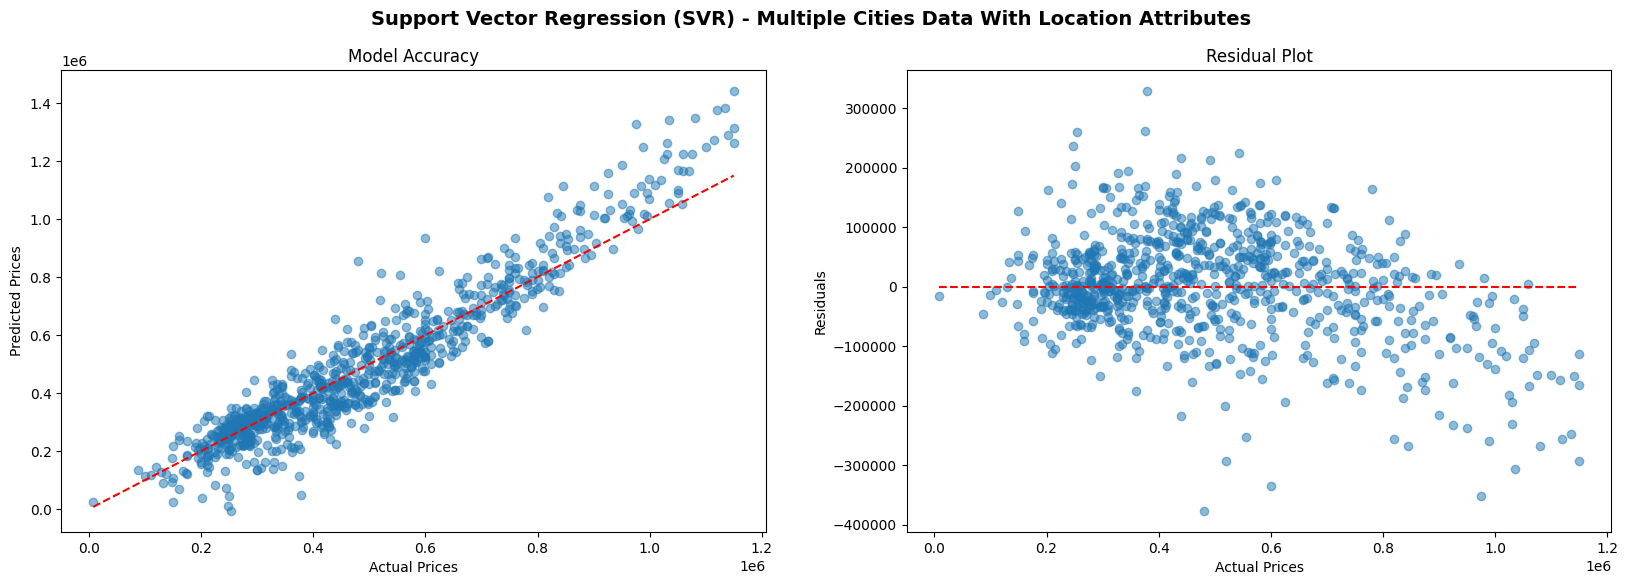

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **SVR** - Multiple Cities Data **with** Location Attributes, except **Street**.

In [ ]:
Data_X = df.drop(columns=['price', 'street'], axis=1)
Data_Y = df['price']


# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 15), (863, 15), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Multi_Without_Street = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Multi_Without_Street} seconds")

Elapsed time: 275.2518231868744 seconds


In [ ]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Multi_Without_Street = End_Time - Start_Time

MSE_SVR_Multi_Without_Street = metrics.mean_squared_error(y_test, predictions)
RMSE_SVR_Multi_Without_Street = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_SVR_Multi_Without_Street = r2_score(y_test, predictions)

print('Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes, except Street')
print(f'MSE: {MSE_SVR_Multi_Without_Street:.4f}')
print(f'RMSE: {RMSE_SVR_Multi_Without_Street:.4f}')
print(f'R2 Score: {R2_SVR_Multi_Without_Street:.12f}')

Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes, except Street
MSE: 13474972057.9099
RMSE: 116081.7473
R2 Score: 0.723076260228


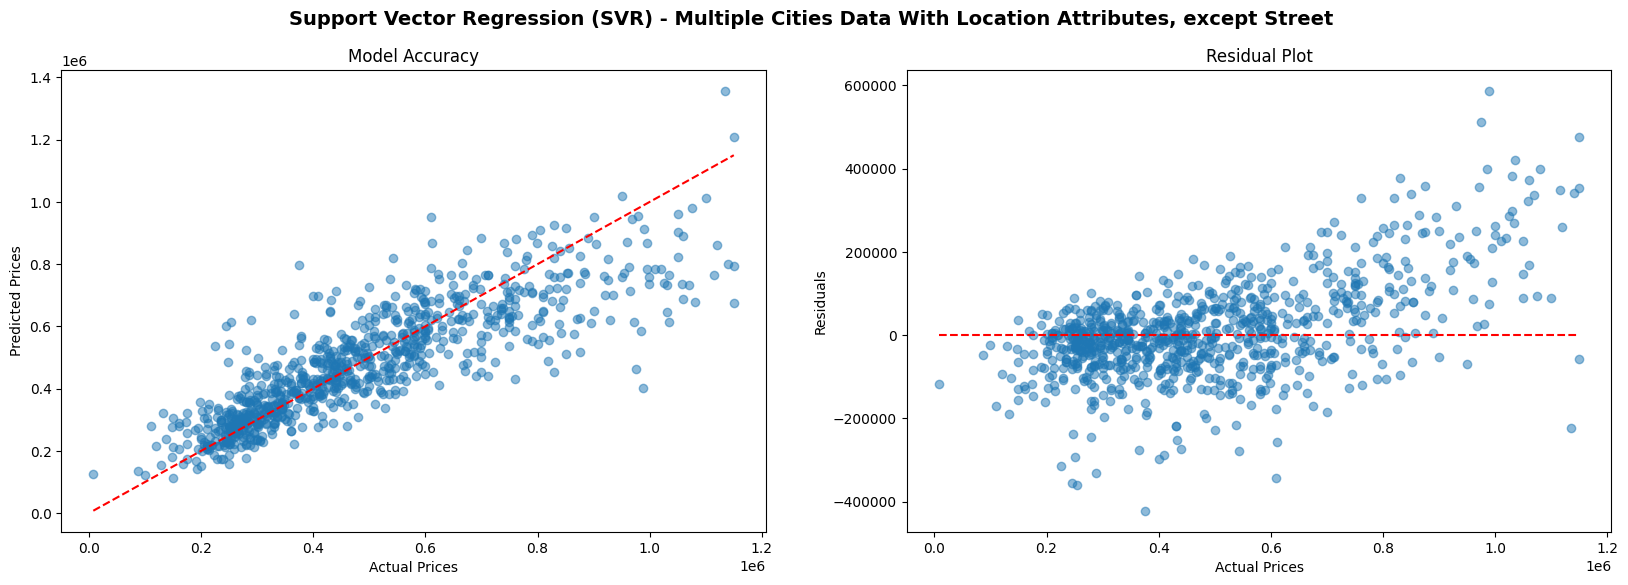

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Multiple Cities Data With Location Attributes, except Street', fontsize=14, fontweight='bold')

plt.show()

### **SVR** - Multiple Cities Data **without** Location Attributes.

In [ ]:
Data_X_Without_Location = df.drop(columns=['price', 'city', 'statezip', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 13), (863, 13), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Multi_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Multi_Without_Location} seconds")

Elapsed time: 37.47878670692444 seconds


In [ ]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Multi_Without_Location = End_Time - Start_Time

MSE_SVR_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions)
R2_SVR_Multi_Without_Location = r2_score(y_test, predictions)
RMSE_SVR_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)

print('Support Vector Regression (SVR) - Multiple Cities Data Without Location Attributes')
print(f'MSE: {MSE_SVR_Multi_Without_Location:.4f}')
print(f'RMSE: {RMSE_SVR_Multi_Without_Location:.4f}')
print(f'R2 Score: {R2_SVR_Multi_Without_Location:.12f}')

Support Vector Regression (SVR) - Multiple Cities Data Without Location Attributes
MSE: 25317030252.3821
RMSE: 159113.2623
R2 Score: 0.479710483460


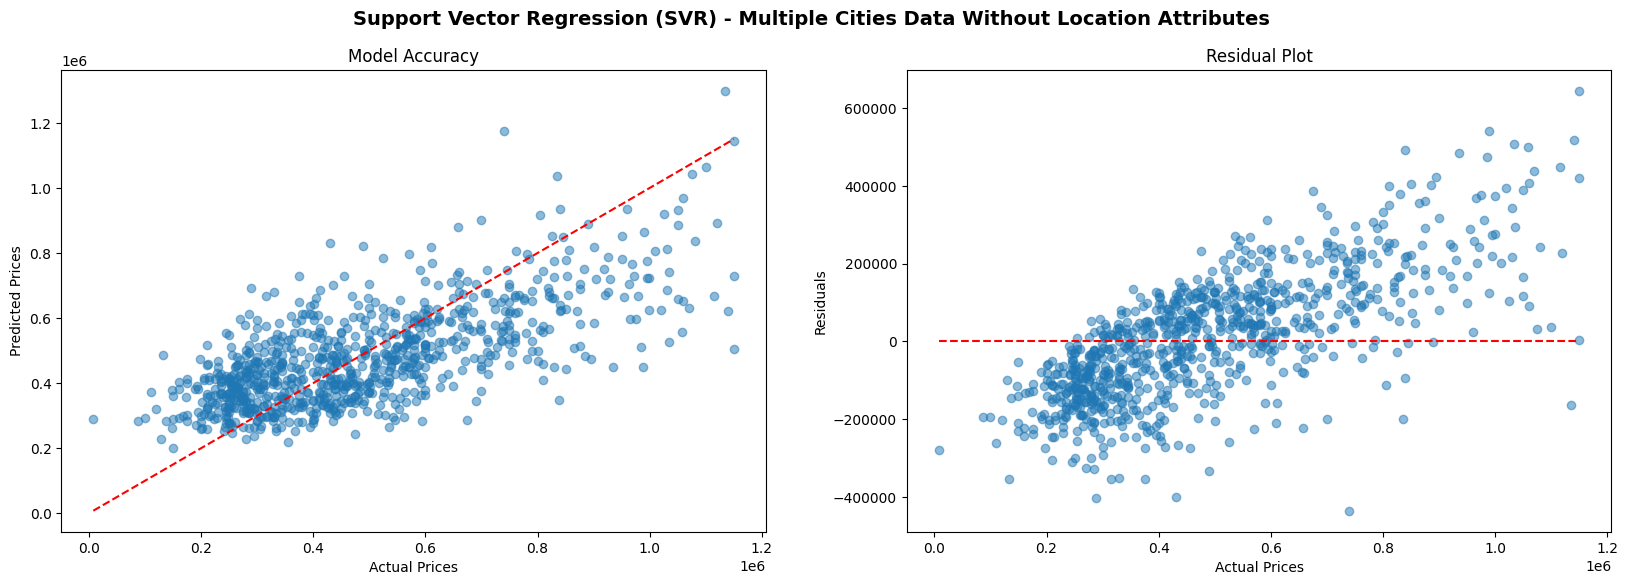

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Multiple Cities Data Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **SVR** - Seattle City Data **with** Location Attributes.

In [ ]:
Seattle_Data_X = seattle_df.drop(columns=['price'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 15), (293, 15), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Seattle_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Seattle_With_Location} seconds")

Elapsed time: 89.95035409927368 seconds


In [ ]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Seattle_With_Location = End_Time - Start_Time

MSE_SVR_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_SVR_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_SVR_Seattle_With_Location = r2_score(y_test, predictions)

print('Support Vector Regression (SVR) - Seattle City Data with Location Attributes.')
print(f'MSE: {MSE_SVR_Seattle_With_Location:.4f}')
print(f'RMSE: {RMSE_SVR_Seattle_With_Location:.4f}')
print(f'R2 Score: {R2_SVR_Seattle_With_Location:.12f}')

Support Vector Regression (SVR) - Seattle City Data with Location Attributes.
MSE: 3030962098.5220
RMSE: 55054.1742
R2 Score: 0.910685093139


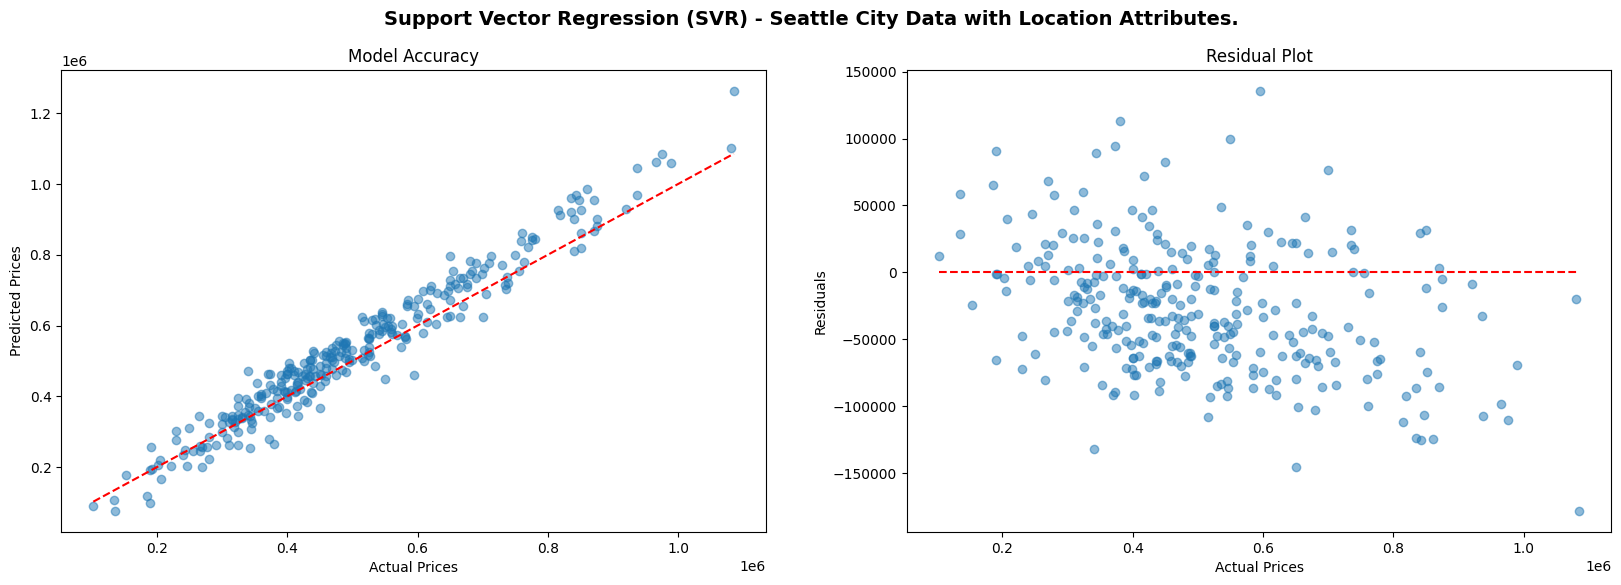

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Seattle City Data with Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

### **SVR** - Seattle City Data **with** Location Attributes, except **Street**.

In [ ]:
Seattle_Data_X = seattle_df.drop(columns=['price', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 14), (293, 14), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Seattle_Without_Street = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Seattle_Without_Street} seconds")

Elapsed time: 43.818790435791016 seconds


In [ ]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Seattle_Without_Street = End_Time - Start_Time

MSE_SVR_Seattle_Without_Street = metrics.mean_squared_error(y_test, predictions)
RMSE_SVR_Seattle_Without_Street = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_SVR_Seattle_Without_Street = r2_score(y_test, predictions)

print('Support Vector Regression (SVR) - Seattle City Data with Location Attributes, except Street.')
print(f'MSE: {MSE_SVR_Seattle_Without_Street:.4f}')
print(f'RMSE: {RMSE_SVR_Seattle_Without_Street:.4f}')
print(f'R2 Score: {R2_SVR_Seattle_Without_Street:.12f}')

Support Vector Regression (SVR) - Seattle City Data with Location Attributes, except Street.
MSE: 11454782394.8177
RMSE: 107027.0171
R2 Score: 0.662456081783


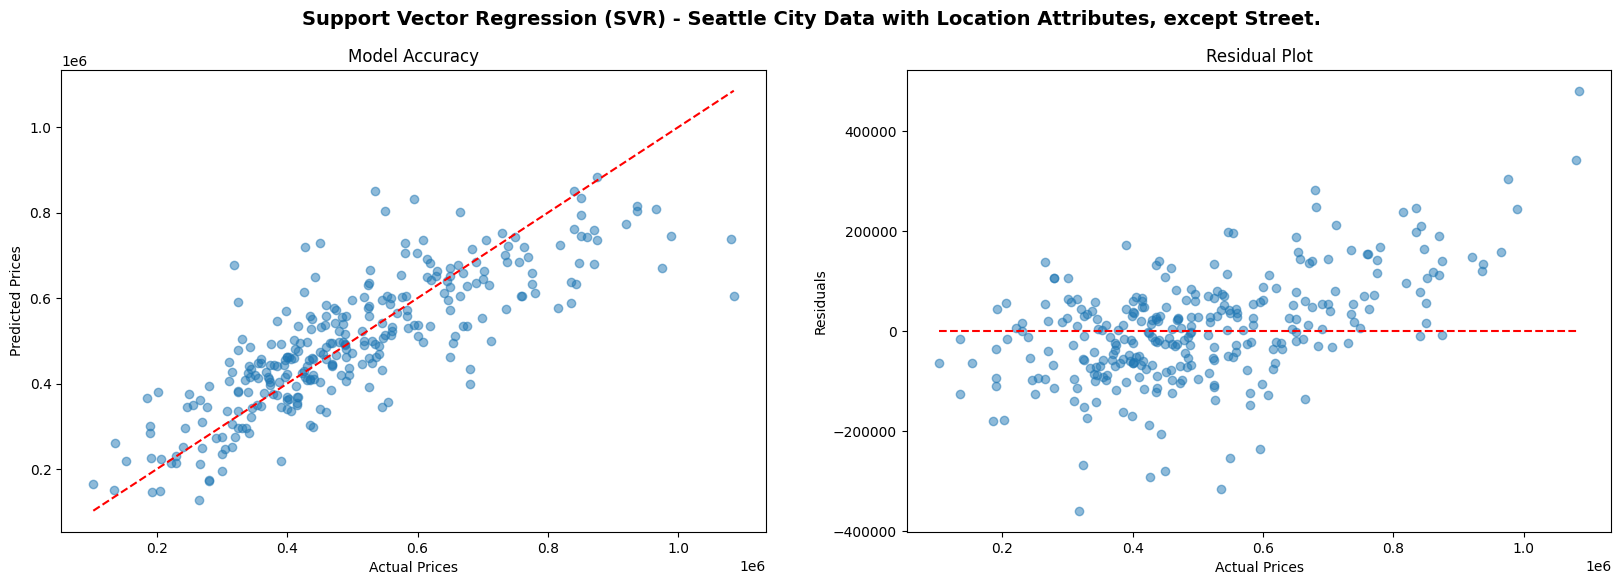

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Seattle City Data with Location Attributes, except Street.', fontsize=14, fontweight='bold')

plt.show()

### **SVR** - Seattle City Data **without** Location Attributes.

In [ ]:
Seattle_Data_X_Without_Location = seattle_df.drop(columns=['price', 'statezip', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X_Without_Location, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 13), (293, 13), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.svm import SVR

#Fitting the dataset into the model
SVR_Model = SVR(kernel='linear')

Start_Time = time.time()
SVR_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_SVR_Seattle_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_SVR_Seattle_Without_Location} seconds")

Elapsed time: 0.36039137840270996 seconds


In [ ]:
Start_Time = time.time()
predictions = SVR_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_SVR_Seattle_Without_Location = End_Time - Start_Time

MSE_SVR_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_SVR_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_SVR_Seattle_Without_Location = r2_score(y_test, predictions)

print('Support Vector Regression (SVR) - Seattle City Data without Location Attributes.')
print(f'MSE: {MSE_SVR_Seattle_Without_Location:.4f}')
print(f'RMSE: {RMSE_SVR_Seattle_Without_Location:.4f}')
print(f'R2 Score: {R2_SVR_Seattle_Without_Location:.12f}')

Support Vector Regression (SVR) - Seattle City Data without Location Attributes.
MSE: 17216485817.8860
RMSE: 131211.6070
R2 Score: 0.492673026812


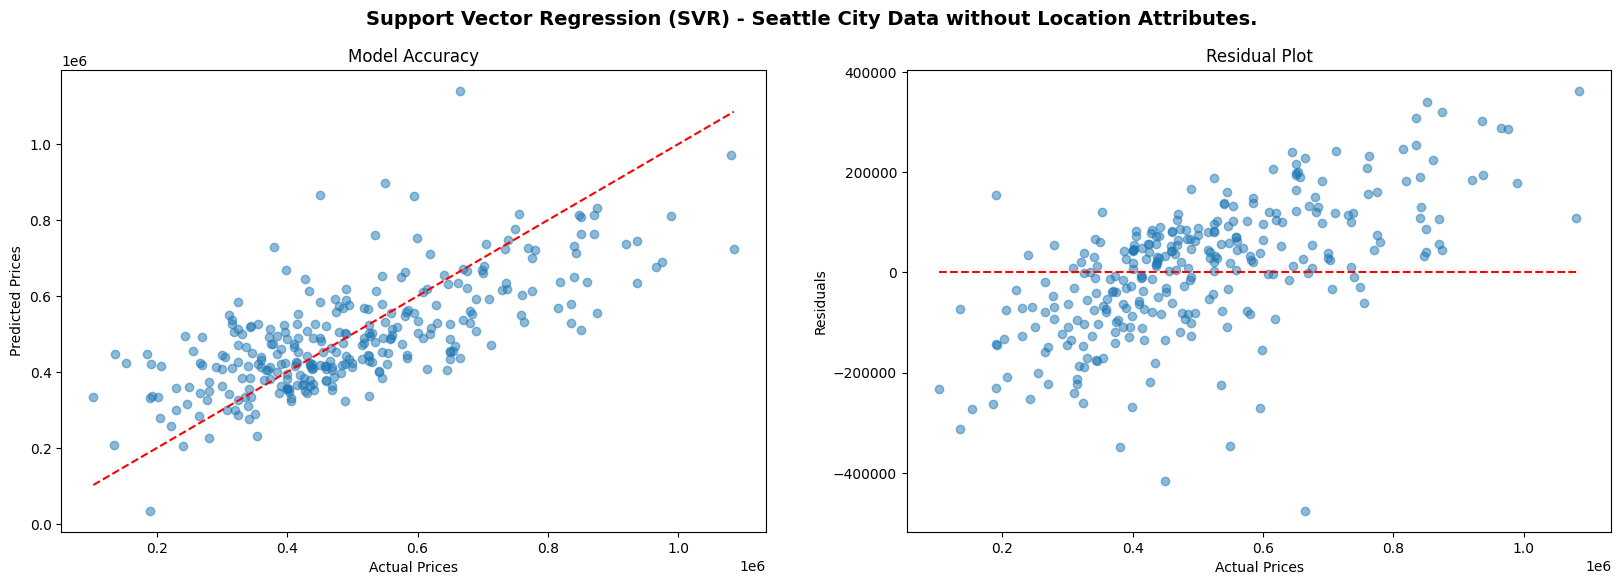

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Support Vector Regression (SVR) - Seattle City Data without Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

## **Decision Tree Regression**

### **Decision Tree** - Multiple Cities Data **with** Location Attributes.

In [ ]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 16), (863, 16), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Multi_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Multi_With_Location} seconds")

Elapsed time: 0.03783988952636719 seconds


In [ ]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Multi_With_Location = End_Time - Start_Time

MSE_DTree_Multi_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_DTree_Multi_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DTree_Multi_With_Location = r2_score(y_test, predictions)

print('Decision Tree Regression - Multiple Cities Data With Location Attributes')
print(f'MSE: {MSE_DTree_Multi_With_Location:.4f}')
print(f'RMSE: {RMSE_DTree_Multi_With_Location:.4f}')
print(f'R2 Score: {R2_DTree_Multi_With_Location:.12f}')

Decision Tree Regression - Multiple Cities Data With Location Attributes
MSE: 292337064.7024
RMSE: 17097.8673
R2 Score: 0.993992189900


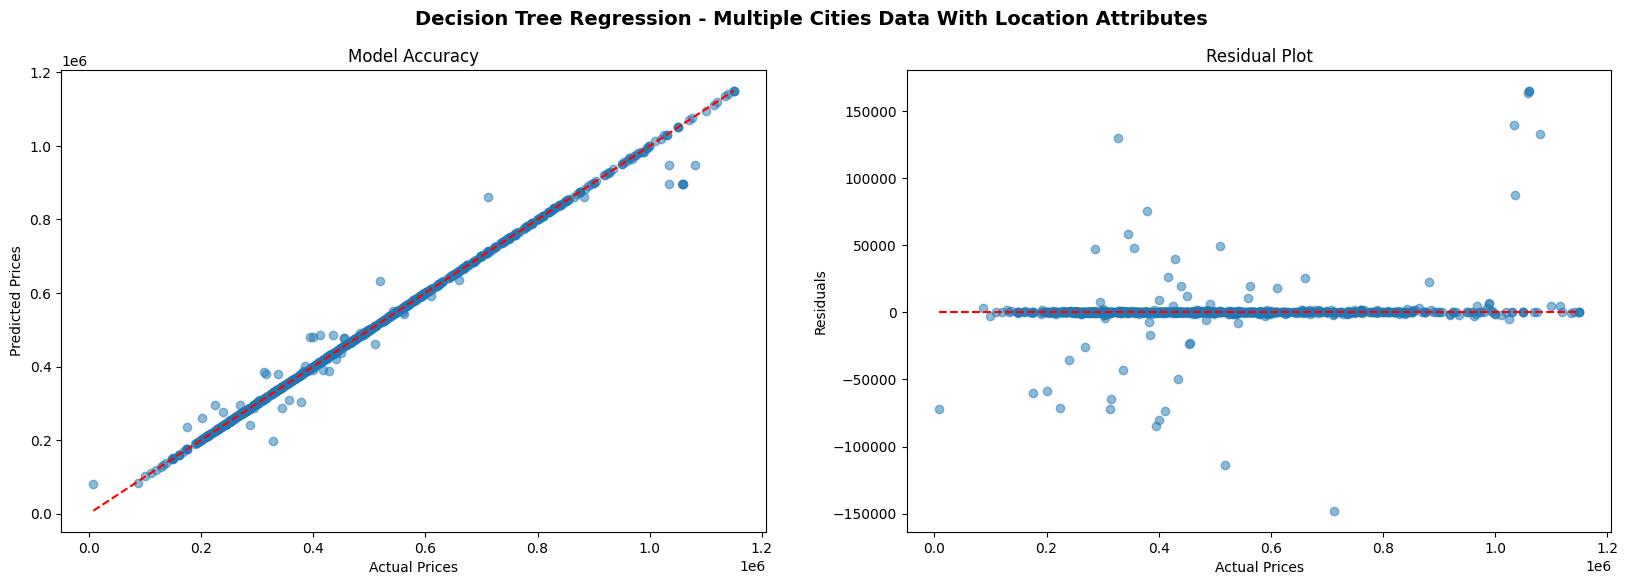

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression - Multiple Cities Data With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** - Multiple Cities Data **with** Location Attributes, except **Street**.

In [ ]:
Data_X = df.drop(columns=['price', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 15), (863, 15), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Multi_Without_Street = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Multi_Without_Street} seconds")

Elapsed time: 0.05103945732116699 seconds


In [ ]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Multi_Without_Street = End_Time - Start_Time

MSE_DTree_Multi_Without_Street = metrics.mean_squared_error(y_test, predictions)
RMSE_DTree_Multi_Without_Street = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DTree_Multi_Without_Street = r2_score(y_test, predictions)

print('Decision Tree Regression - Multiple Cities Data With Location Attributes, except Street')
print(f'MSE: {MSE_DTree_Multi_Without_Street:.4f}')
print(f'RMSE: {RMSE_DTree_Multi_Without_Street:.4f}')
print(f'R2 Score: {R2_DTree_Multi_Without_Street:.12f}')

Decision Tree Regression - Multiple Cities Data With Location Attributes, except Street
MSE: 19593280500.6545
RMSE: 139975.9997
R2 Score: 0.597339090032


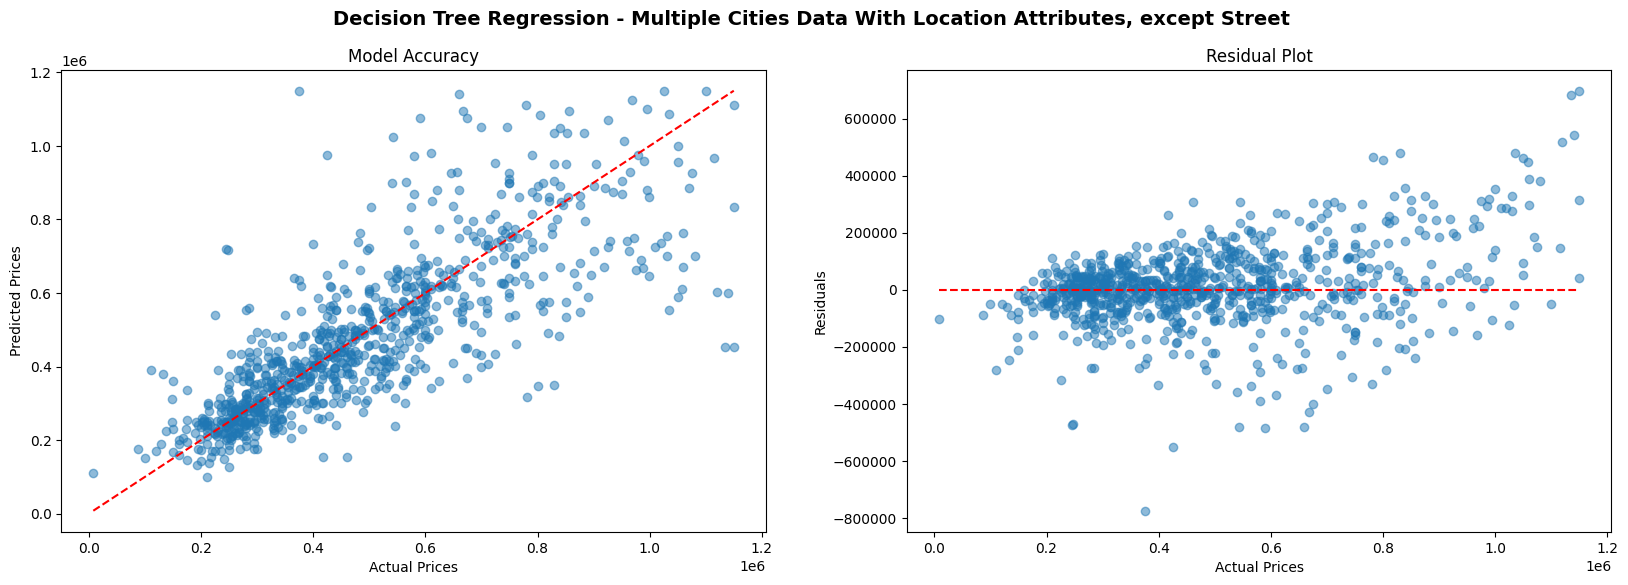

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression - Multiple Cities Data With Location Attributes, except Street', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** - Multiple Cities Data **without** Location Attributes.

In [ ]:
Data_X_Without_Location = df.drop(columns=['price', 'city', 'statezip', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 13), (863, 13), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Multi_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Multi_Without_Location} seconds")

Elapsed time: 0.03990292549133301 seconds


In [ ]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Multi_Without_Location = End_Time - Start_Time

MSE_DTree_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_DTree_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DTree_Multi_Without_Location = r2_score(y_test, predictions)

print('Decision Tree Regression - Multiple Cities Data Without Location Attributes')
print(f'MSE: {MSE_DTree_Multi_Without_Location:.4f}')
print(f'RMSE: {RMSE_DTree_Multi_Without_Location:.4f}')
print(f'R2 Score: {R2_DTree_Multi_Without_Location:.12f}')

Decision Tree Regression - Multiple Cities Data Without Location Attributes
MSE: 41894549390.6323
RMSE: 204681.5805
R2 Score: 0.139026393269


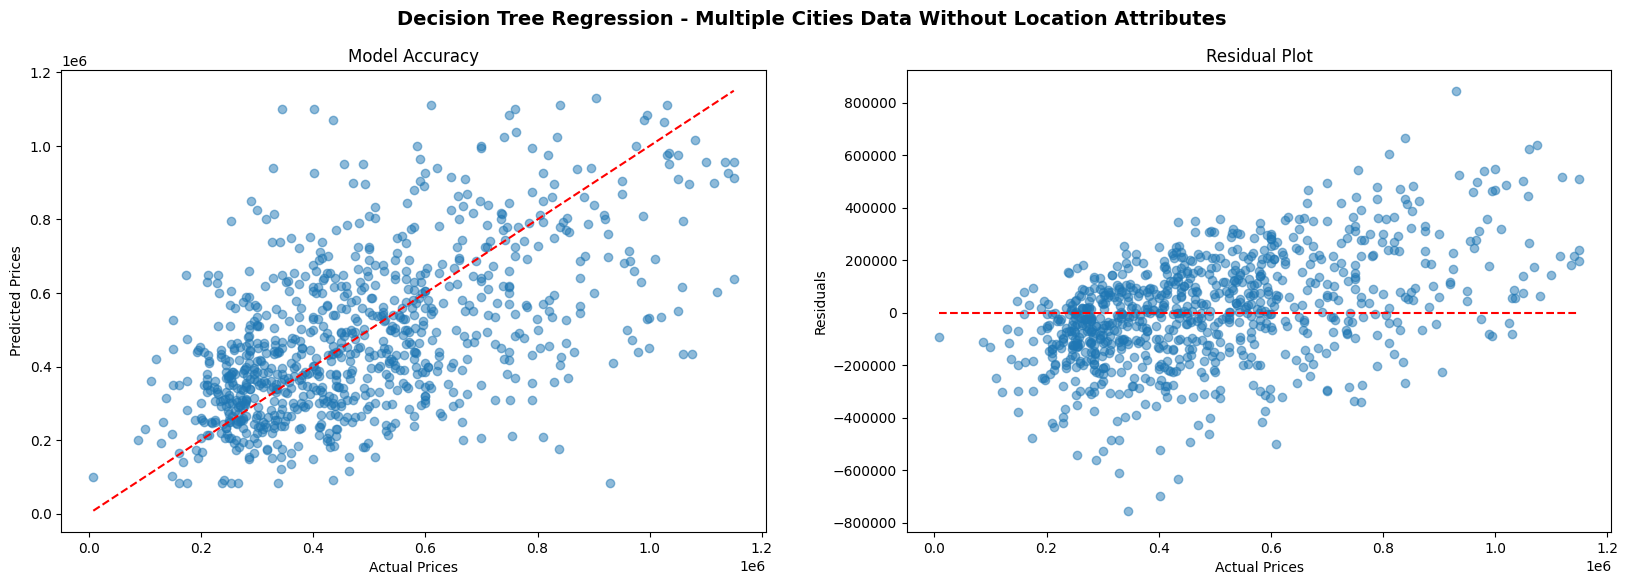

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression - Multiple Cities Data Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** - Seattle City Data **with** Location Attributes.

In [ ]:
Seattle_Data_X = seattle_df.drop(columns=['price'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 15), (293, 15), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Seattle_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Seattle_With_Location} seconds")

Elapsed time: 0.020404577255249023 seconds


In [ ]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Seattle_With_Location = End_Time - Start_Time

MSE_DT_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_DT_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DT_Seattle_With_Location = r2_score(y_test, predictions)

print('Decision Tree Regression - Seattle City Data with Location Attributes.')
print(f'MSE: {MSE_DT_Seattle_With_Location:.4f}')
print(f'RMSE: {RMSE_DT_Seattle_With_Location:.4f}')
print(f'R2 Score: {R2_DT_Seattle_With_Location:.12f}')

Decision Tree Regression - Seattle City Data with Location Attributes.
MSE: 353945086.7270
RMSE: 18813.4284
R2 Score: 0.989570119511


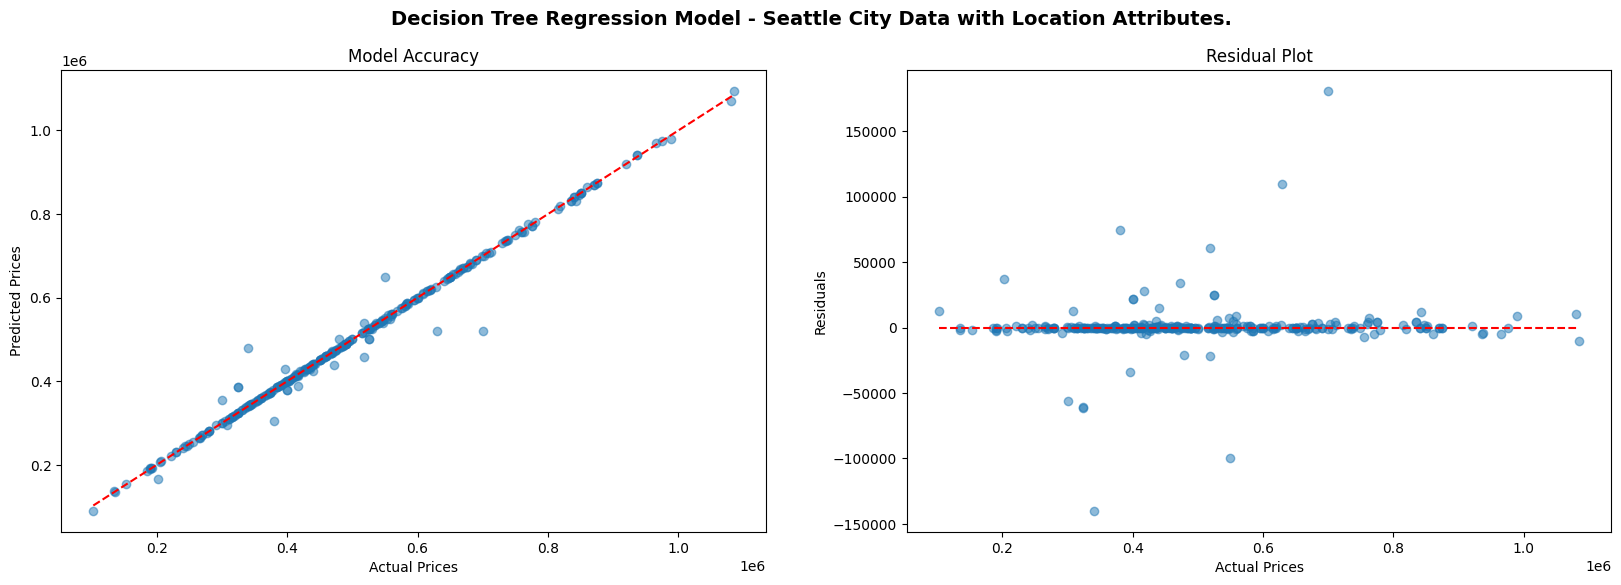

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression Model - Seattle City Data with Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** - Seattle City Data **with** Location Attributes, except **Street**.

In [ ]:
Seattle_Data_X = seattle_df.drop(columns=['price', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 14), (293, 14), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Seattle_Without_Street = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Seattle_Without_Street} seconds")

Elapsed time: 0.022009849548339844 seconds


In [ ]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Seattle_Without_Street = End_Time - Start_Time

MSE_DT_Seattle_Without_Street = metrics.mean_squared_error(y_test, predictions)
RMSE_DT_Seattle_Without_Street = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DT_Seattle_Without_Street = r2_score(y_test, predictions)

print('Decision Tree Regression - Seattle City Data with Location Attributes, except Street.')
print(f'MSE: {MSE_DT_Seattle_Without_Street:.4f}')
print(f'RMSE: {RMSE_DT_Seattle_Without_Street:.4f}')
print(f'R2 Score: {R2_DT_Seattle_Without_Street:.12f}')

Decision Tree Regression - Seattle City Data with Location Attributes, except Street.
MSE: 21571137988.5646
RMSE: 146871.1612
R2 Score: 0.364352269114


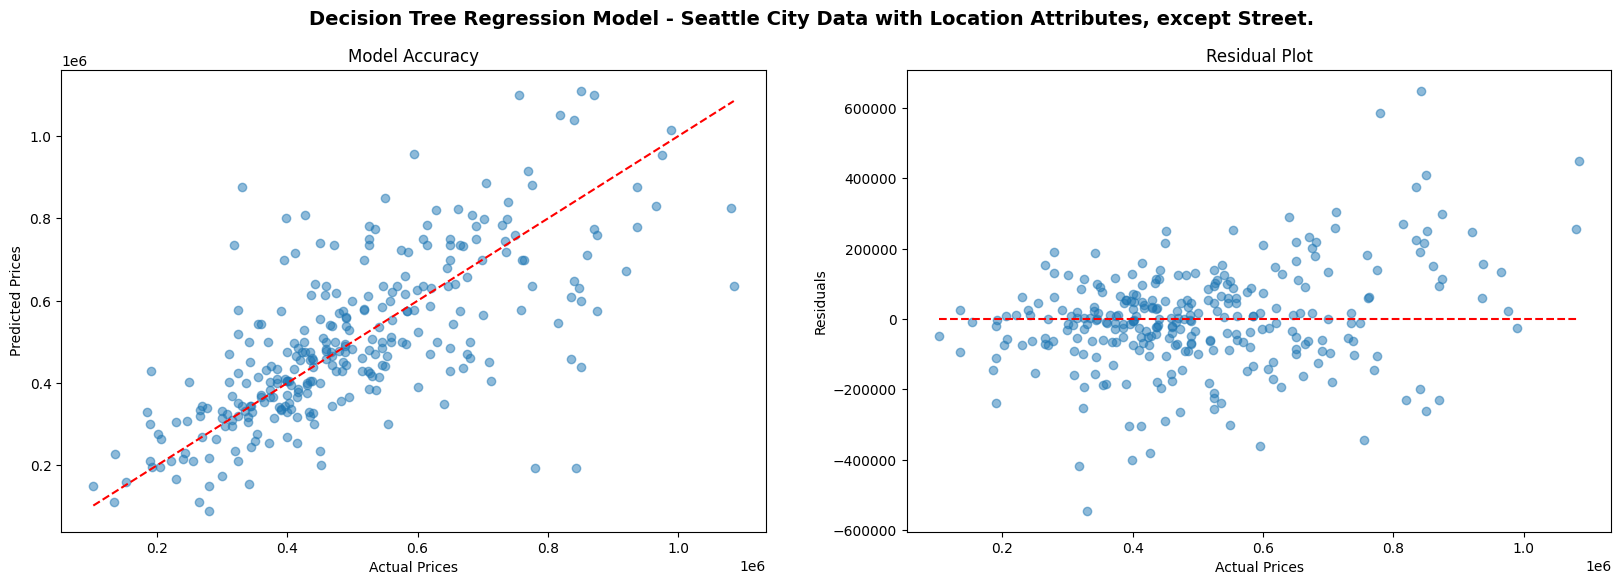

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression Model - Seattle City Data with Location Attributes, except Street.', fontsize=14, fontweight='bold')

plt.show()

### **Decision Tree** - Seattle City Data **without** Location Attributes.

In [ ]:
Seattle_Data_X_Without_Location = seattle_df.drop(columns=['price', 'statezip', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X_Without_Location, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 13), (293, 13), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.tree import DecisionTreeRegressor

#Fitting the dataset into the model
Tree_Model = DecisionTreeRegressor(random_state=220)

Start_Time = time.time()
Tree_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_DT_Seattle_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_DT_Seattle_Without_Location} seconds")

Elapsed time: 0.020915508270263672 seconds


In [ ]:
Start_Time = time.time()
predictions = Tree_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_DT_Seattle_Without_Location = End_Time - Start_Time

MSE_DT_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_DT_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_DT_Seattle_Without_Location = r2_score(y_test, predictions)

print('Decision Tree Regression - Seattle City Data without Location Attributes.')
print(f'MSE: {MSE_DT_Seattle_Without_Location:.4f}')
print(f'RMSE: {RMSE_DT_Seattle_Without_Location:.4f}')
print(f'R2 Score: {R2_DT_Seattle_Without_Location:.12f}')

Decision Tree Regression - Seattle City Data without Location Attributes.
MSE: 33177478481.0404
RMSE: 182146.8597
R2 Score: 0.022342311093


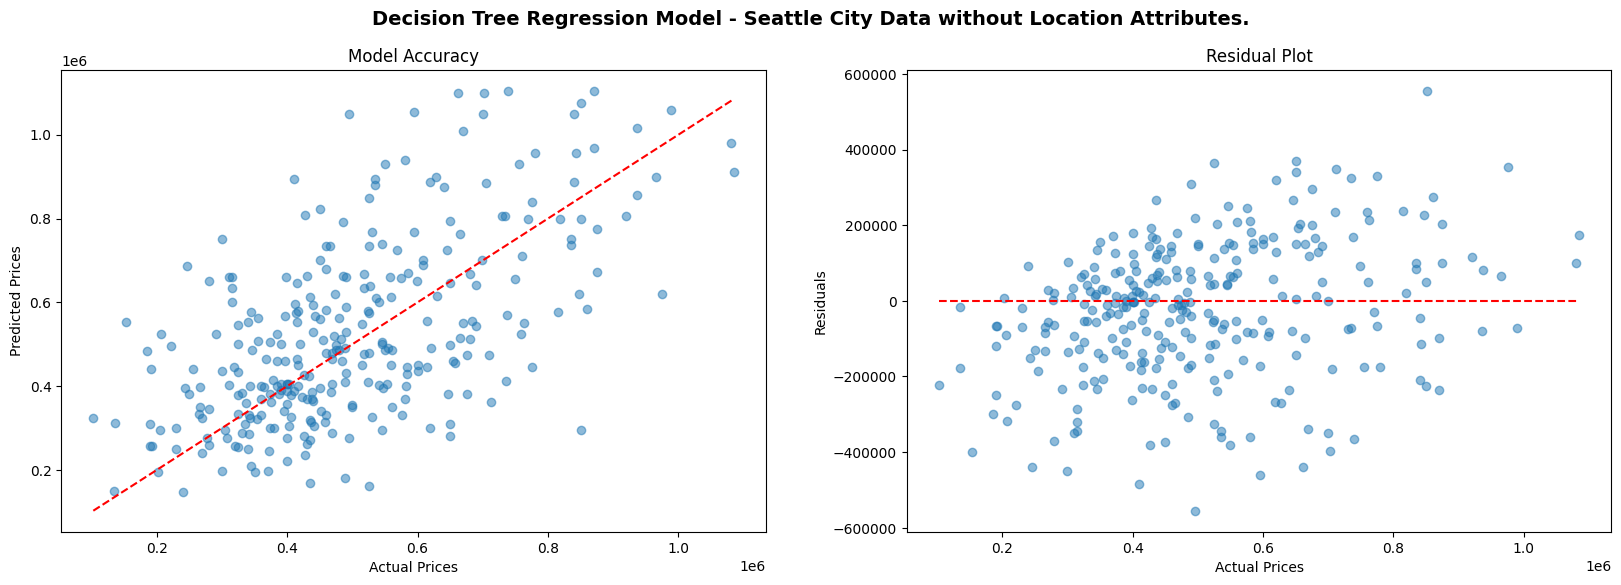

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Decision Tree Regression Model - Seattle City Data without Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

## **Random Forest Regression**

### **Random Forest** - Multiple Cities Data **with** Location Attributes.

In [ ]:
Data_X = df.drop(columns=['price'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 16), (863, 16), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Multi_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Multi_With_Location} seconds")

Elapsed time: 20.9583158493042 seconds


In [ ]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Multi_With_Location = End_Time - Start_Time

MSE_RForest_Multi_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_RForest_Multi_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RForest_Multi_With_Location = r2_score(y_test, predictions)

print('Random Forest Regression - Multiple Cities Data With Location Attributes')
print(f'MSE: {MSE_RForest_Multi_With_Location:.4f}')
print(f'RMSE: {RMSE_RForest_Multi_With_Location:.4f}')
print(f'R2 Score: {R2_RForest_Multi_With_Location:.12f}')

Random Forest Regression - Multiple Cities Data With Location Attributes
MSE: 123478198.7285
RMSE: 11112.0745
R2 Score: 0.997462403304


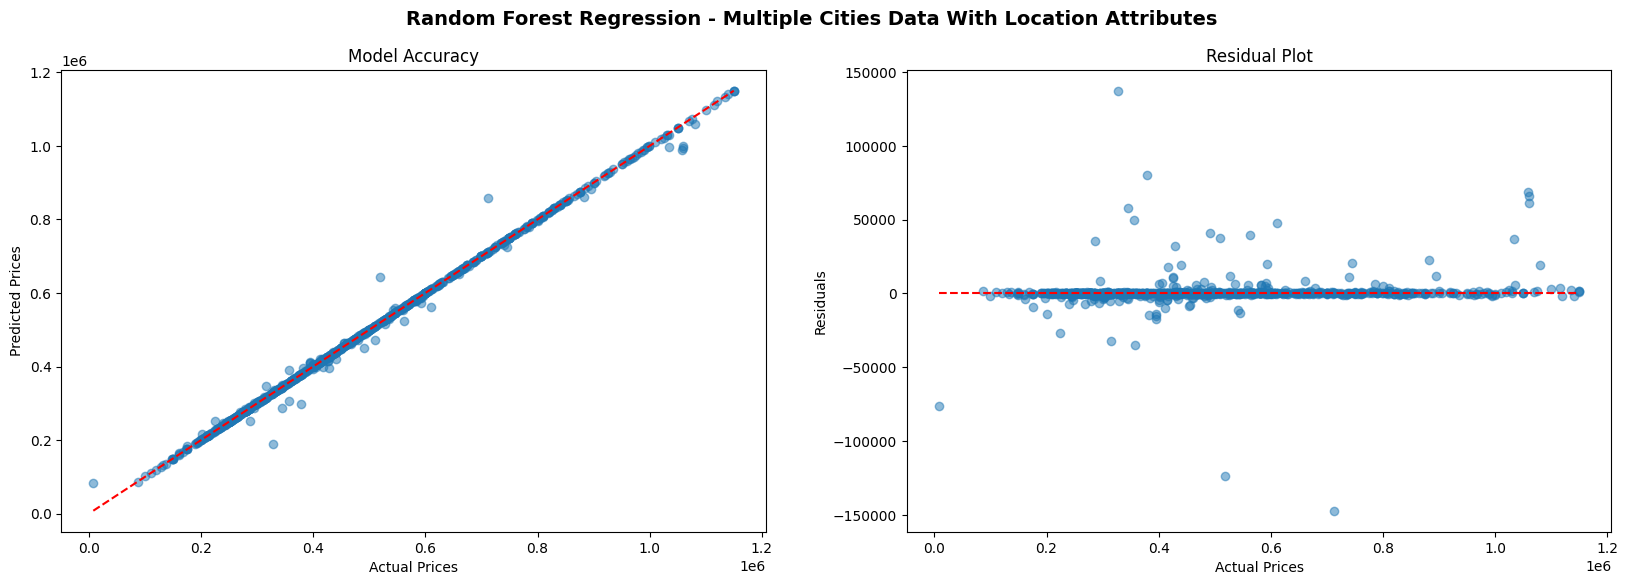

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression - Multiple Cities Data With Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Random Forest** - Multiple Cities Data **with** Location Attributes, except **Street**.

In [ ]:
Data_X = df.drop(columns=['price', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 15), (863, 15), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Multi_Without_Street = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Multi_Without_Street} seconds")

Elapsed time: 23.723063945770264 seconds


In [ ]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Multi_Without_Street = End_Time - Start_Time

MSE_RForest_Multi_Without_Street = metrics.mean_squared_error(y_test, predictions)
RMSE_RForest_Multi_Without_Street = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RForest_Multi_Without_Street = r2_score(y_test, predictions)

print('Random Forest Regression - Multiple Cities Data With Location Attributes, except Street')
print(f'MSE: {MSE_RForest_Multi_Without_Street:.4f}')
print(f'RMSE: {RMSE_RForest_Multi_Without_Street:.4f}')
print(f'R2 Score: {R2_RForest_Multi_Without_Street:.12f}')

Random Forest Regression - Multiple Cities Data With Location Attributes, except Street
MSE: 10699532624.9797
RMSE: 103438.5452
R2 Score: 0.780114231363


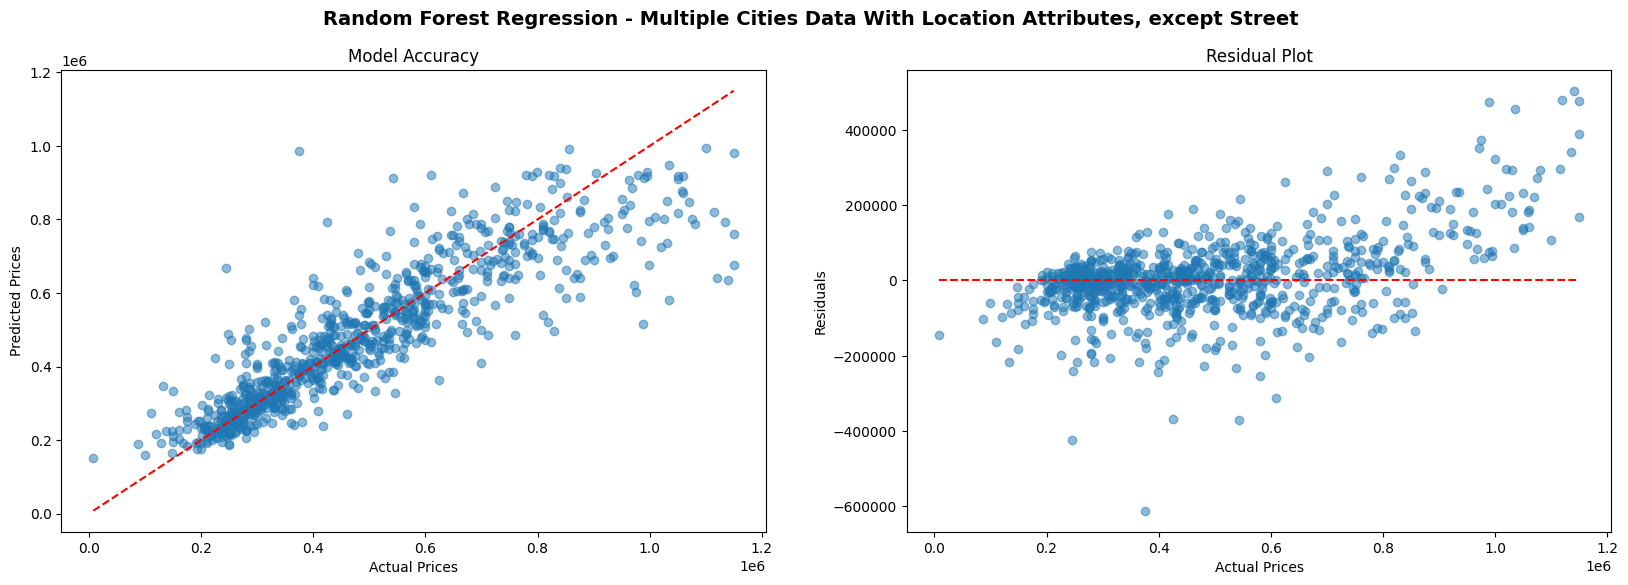

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

# Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

# Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression - Multiple Cities Data With Location Attributes, except Street', fontsize=14, fontweight='bold')

plt.show()

### **Random Forest** - Multiple Cities Data **without** Location Attributes.

In [ ]:
Data_X_Without_Location = df.drop(columns=['price', 'city', 'statezip', 'street'], axis=1)
Data_Y = df['price']

# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_X_Without_Location, Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3448, 13), (863, 13), (3448,), (863,))

In [ ]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Multi_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Multi_Without_Location} seconds")

Elapsed time: 19.828402996063232 seconds


In [ ]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Multi_Without_Location = End_Time - Start_Time

MSE_RForest_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_RForest_Multi_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RForest_Multi_Without_Location = r2_score(y_test, predictions)

print('Random Forest Regression - Multiple Cities Data Without Location Attributes')
print(f'MSE: {MSE_RForest_Multi_Without_Location:.4f}')
print(f'RMSE: {RMSE_RForest_Multi_Without_Location:.4f}')
print(f'R2 Score: {R2_RForest_Multi_Without_Location:.12f}')

Random Forest Regression - Multiple Cities Data Without Location Attributes
MSE: 24535415836.9488
RMSE: 156637.8493
R2 Score: 0.495773417472


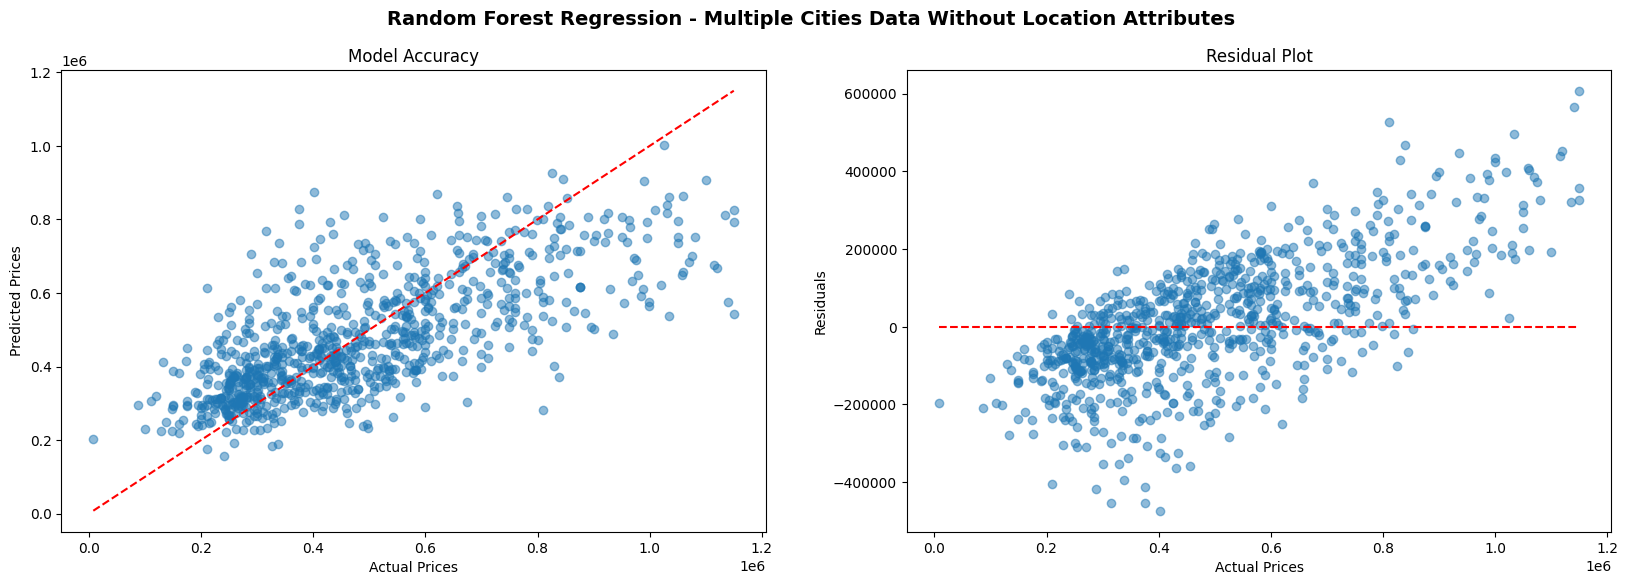

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression - Multiple Cities Data Without Location Attributes', fontsize=14, fontweight='bold')

plt.show()

### **Random Forest** - Seattle City Data **with** Location Attributes.

In [ ]:
Seattle_Data_X = seattle_df.drop(columns=['price'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 15), (293, 15), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Seattle_With_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Seattle_With_Location} seconds")

Elapsed time: 8.263633489608765 seconds


In [ ]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Seattle_With_Location = End_Time - Start_Time

MSE_RF_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_RF_Seattle_With_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RF_Seattle_With_Location = r2_score(y_test, predictions)

print('Random Forest Regression - Seattle City Data with Location Attributes.')
print(f'MSE: {MSE_RF_Seattle_With_Location:.4f}')
print(f'RMSE: {RMSE_RF_Seattle_With_Location:.4f}')
print(f'R2 Score: {R2_RF_Seattle_With_Location:.12f}')

Random Forest Regression - Seattle City Data with Location Attributes.
MSE: 111107949.8914
RMSE: 10540.7756
R2 Score: 0.996725925342


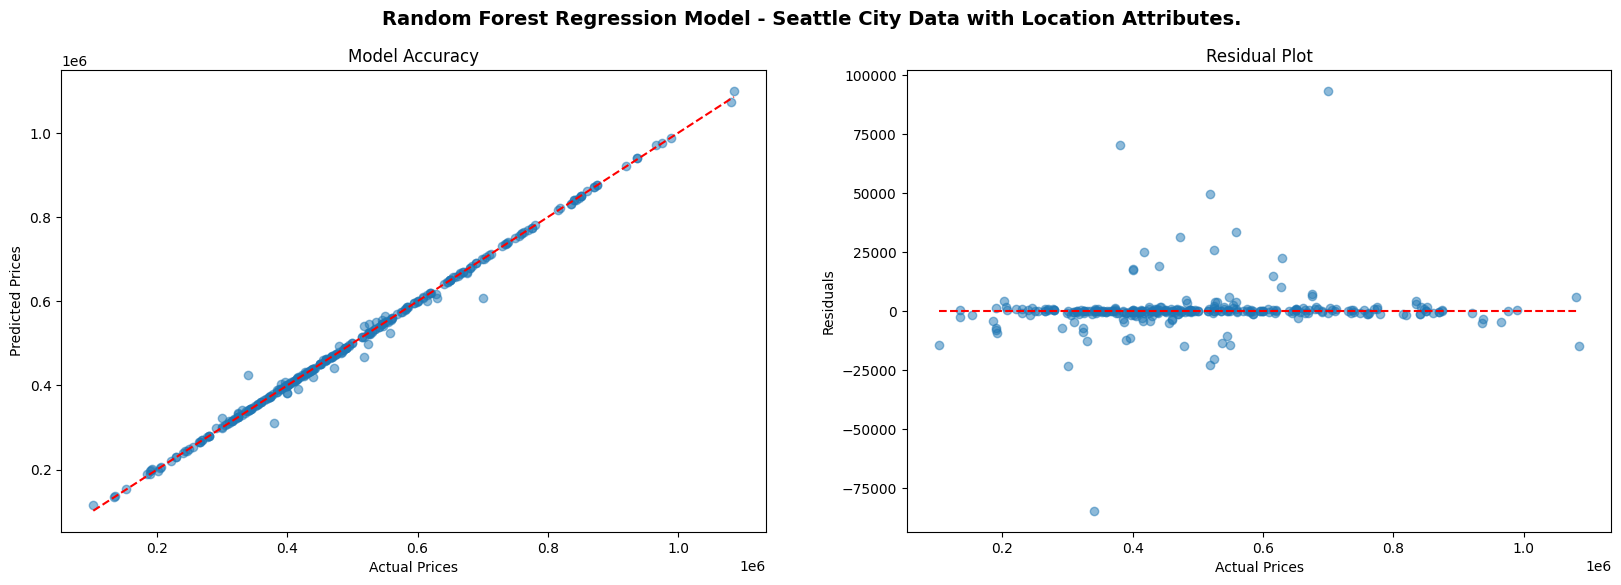

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression Model - Seattle City Data with Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

### **Random Forest** - Seattle City Data **with** Location Attributes, except **Street**.

In [ ]:
Seattle_Data_X = seattle_df.drop(columns=['price', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 14), (293, 14), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Seattle_Without_Street = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Seattle_Without_Street} seconds")

Elapsed time: 7.183244705200195 seconds


In [ ]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Seattle_Without_Street = End_Time - Start_Time

MSE_RF_Seattle_Without_Street = metrics.mean_squared_error(y_test, predictions)
RMSE_RF_Seattle_Without_Street = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RF_Seattle_Without_Street = r2_score(y_test, predictions)

print('Random Forest Regression - Seattle City Data with Location Attributes, except Street.')
print(f'MSE: {MSE_RF_Seattle_Without_Street:.4f}')
print(f'RMSE: {RMSE_RF_Seattle_Without_Street:.4f}')
print(f'R2 Score: {R2_RF_Seattle_Without_Street:.12f}')

Random Forest Regression - Seattle City Data with Location Attributes, except Street.
MSE: 10354178413.6108
RMSE: 101755.4835
R2 Score: 0.694888140937


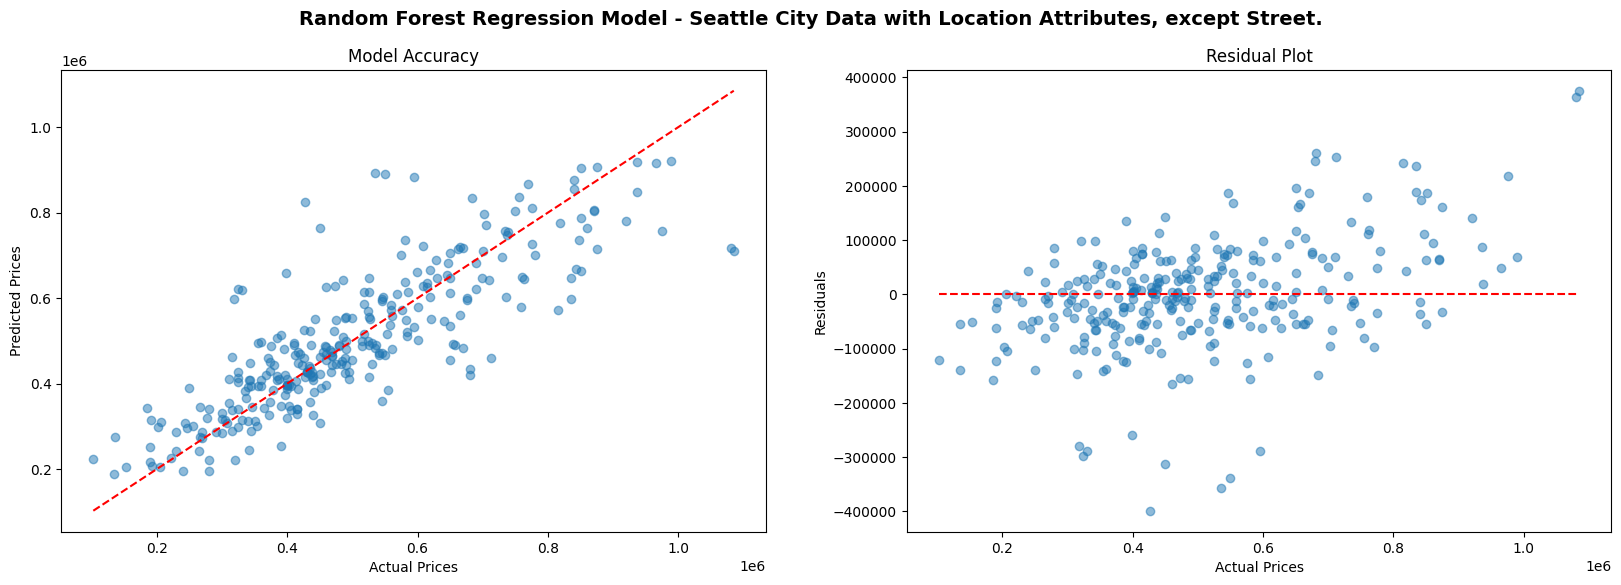

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression Model - Seattle City Data with Location Attributes, except Street.', fontsize=14, fontweight='bold')

plt.show()

### **Random Forest** - Seattle City Data **without** Location Attributes.

In [ ]:
Seattle_Data_X_Without_Location = seattle_df.drop(columns=['price', 'statezip', 'street'], axis=1)
Seattle_Data_Y = seattle_df['price']
# split the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Seattle_Data_X_Without_Location, Seattle_Data_Y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 13), (293, 13), (1168,), (293,))

In [ ]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

#Fitting the dataset into the model
Forest_Model = RandomForestRegressor(n_estimators=1000, random_state=220)

Start_Time = time.time()
Forest_Model.fit(X_train, y_train)
End_Time = time.time()

Training_Time_RF_Seattle_Without_Location = End_Time - Start_Time
print(f"Elapsed time: {Training_Time_RF_Seattle_Without_Location} seconds")

Elapsed time: 7.930687665939331 seconds


In [ ]:
Start_Time = time.time()
predictions = Forest_Model.predict(X_test)
End_Time = time.time()
Prediction_Time_RF_Seattle_Without_Location = End_Time - Start_Time

MSE_RF_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions)
RMSE_RF_Seattle_Without_Location = metrics.mean_squared_error(y_test, predictions, squared=False)
R2_RF_Seattle_Without_Location = r2_score(y_test, predictions)

print('Random Forest Regression - Seattle City Data without Location Attributes.')
print(f'MSE: {MSE_RF_Seattle_Without_Location:.4f}')
print(f'RMSE: {RMSE_RF_Seattle_Without_Location:.4f}')
print(f'R2 Score: {R2_RF_Seattle_Without_Location:.12f}')

Random Forest Regression - Seattle City Data without Location Attributes.
MSE: 16128692483.9268
RMSE: 126998.7893
R2 Score: 0.524727588086


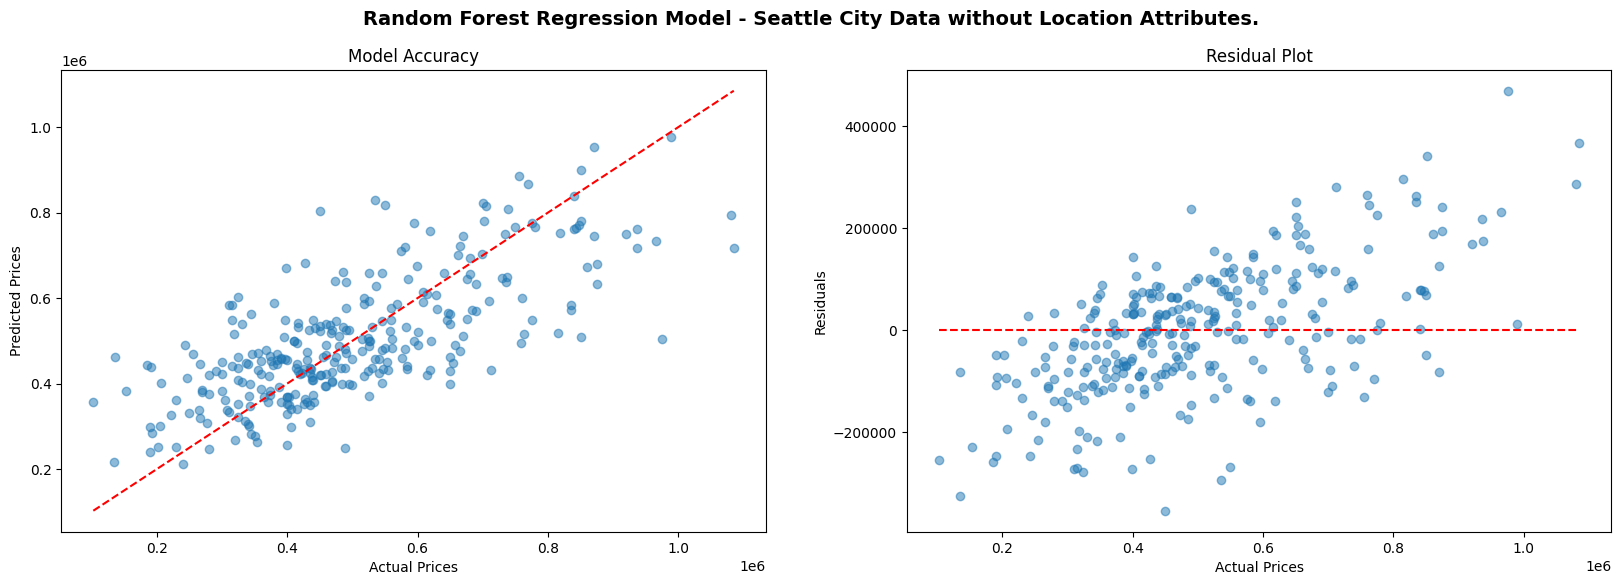

In [ ]:
plt.figure(figsize=(20, 6))
residuals = y_test - predictions

#Scatter plot for accuracy
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Accuracy')

#Residual plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.suptitle('Random Forest Regression Model - Seattle City Data without Location Attributes.', fontsize=14, fontweight='bold')

plt.show()

# **Comparing The Models' Perfomance**



In [ ]:
All_R2_Score_Data = {
    'Data_Set': ['Multiple Cities Data With Location', 'Multiple Cities Data With Location, Except Street', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data With Location, Except Street', 'Seattle City Data Without Location'] * 4,

    'Models': ['Linear Regression'] * 6 + ['Support Vector Regression (SVR)'] * 6 + ['Decision Tree Regression'] * 6 + ['Random Forest Regression'] * 6,

    'R2_Score': [R2_Linear_Multi_With_Location, R2_Linear_Multi_Without_Street, R2_Linear_Multi_Without_Location, R2_Linear_Seattle_With_Location, R2_Linear_Seattle_Without_Street, R2_Linear_Seattle_Without_Location,
                    R2_SVR_Multi_With_Location, R2_SVR_Multi_Without_Street, R2_SVR_Multi_Without_Location, R2_SVR_Seattle_With_Location, R2_SVR_Seattle_Without_Street, R2_SVR_Seattle_Without_Location,
                    R2_DTree_Multi_With_Location, R2_DTree_Multi_Without_Street, R2_DTree_Multi_Without_Location, R2_DT_Seattle_With_Location, R2_DT_Seattle_Without_Street, R2_DT_Seattle_Without_Location,
                    R2_RForest_Multi_With_Location, R2_RForest_Multi_Without_Street, R2_RForest_Multi_Without_Location, R2_RF_Seattle_With_Location, R2_RF_Seattle_Without_Street, R2_RF_Seattle_Without_Location]
}

All_R2_Score_df = pd.DataFrame(All_R2_Score_Data)


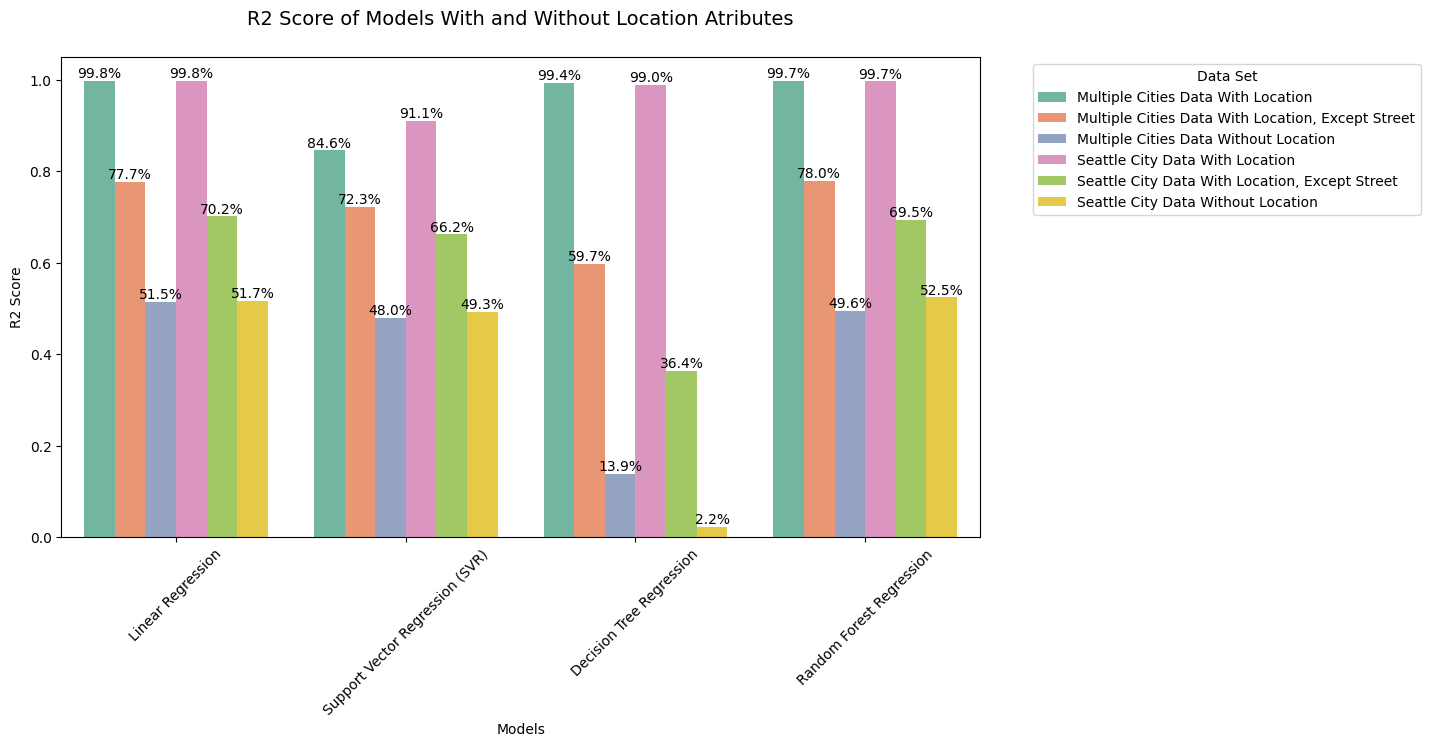

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=All_R2_Score_df, y='R2_Score', x='Models', hue='Data_Set', palette='Set2')
plt.title('R2 Score of Models With and Without Location Atributes', fontsize=14, y=1.05)
plt.ylabel('R2 Score')
plt.xlabel('Models')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.legend(title='Data Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adding percentages:
for p in ax.patches:
    height = p.get_height()
    # Formating as percentage with 1 decimal place
    percentage = f'{height:.1%}'

    # Getting x and y coordinates for text position
    x = p.get_x() + p.get_width() / 2
    y = height

    if height != 0:
      ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [ ]:
All_RMSE_Data = {
    'Data_Set': ['Multiple Cities Data With Location', 'Multiple Cities Data With Location, Except Street', 'Multiple Cities Data Without Location', 'Seattle City Data With Location', 'Seattle City Data With Location, Except Street', 'Seattle City Data Without Location'] * 4,

    'Models': ['Linear Regression'] * 6 + ['Support Vector Regression (SVR)'] * 6 + ['Decision Tree Regression'] * 6 + ['Random Forest Regression'] * 6,

    'RMSE_Values': [RMSE_Linear_Multi_With_Location, RMSE_Linear_Multi_Without_Street, RMSE_Linear_Multi_Without_Location, RMSE_Linear_Seattle_With_Location, RMSE_Linear_Seattle_Without_Street, RMSE_Linear_Seattle_Without_Location,
                    RMSE_SVR_Multi_With_Location, RMSE_SVR_Multi_Without_Street, RMSE_SVR_Multi_Without_Location, RMSE_SVR_Seattle_With_Location, RMSE_SVR_Seattle_Without_Street, RMSE_SVR_Seattle_Without_Location,
                    RMSE_DTree_Multi_With_Location, RMSE_DTree_Multi_Without_Street, RMSE_DTree_Multi_Without_Location, RMSE_DT_Seattle_With_Location, RMSE_DT_Seattle_Without_Street,RMSE_DT_Seattle_Without_Location,
                    RMSE_RForest_Multi_With_Location, RMSE_RForest_Multi_Without_Street, RMSE_RForest_Multi_Without_Location, RMSE_RF_Seattle_With_Location, RMSE_RF_Seattle_Without_Street, RMSE_RF_Seattle_Without_Location]
}

All_RMSE_df = pd.DataFrame(All_RMSE_Data)

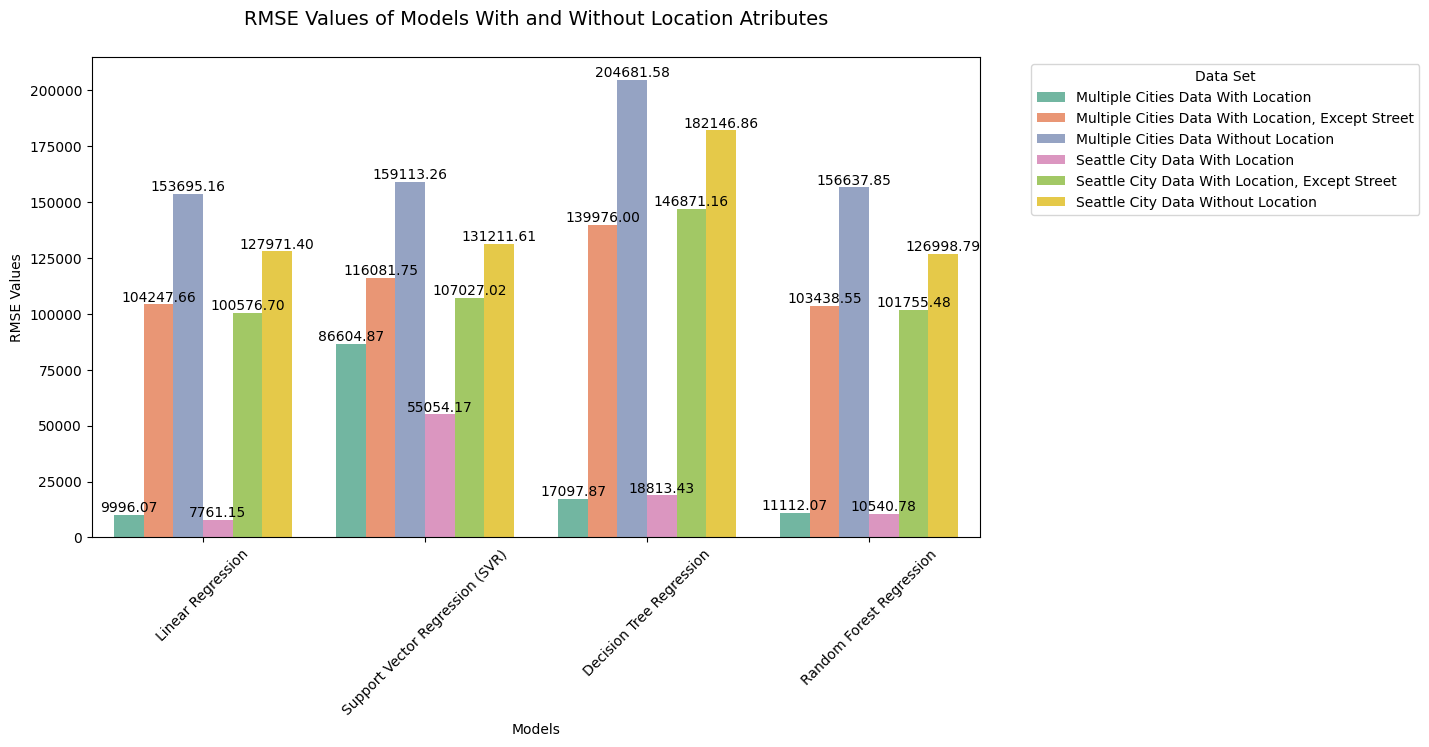

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=All_RMSE_df, y='RMSE_Values', x='Models', hue='Data_Set', palette='Set2')
plt.title('RMSE Values of Models With and Without Location Atributes', fontsize=14, y=1.05,)
plt.ylabel('RMSE Values')
plt.xlabel('Models')

plt.tight_layout()
plt.legend(title='Data Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adding percentages:
for p in ax.patches:
    height = p.get_height()
    RMSE = f'{height:.2f}'

    # Getting x and y coordinates for text position
    x = p.get_x() + p.get_width() / 2
    y = height

    if height != 0:
      ax.annotate(RMSE, (x, y), ha='center', va='bottom')

plt.show()

In [ ]:
# Training time data
Training_Time_Data = {
    'Runtime_Data_Set': ['Training Time - Multiple Cities Data With Location', 'Training Time - Multiple Cities Data With Location, Except Street', 'Training Time - Multiple Cities Data Without Location',
                         'Training Time - Seattle City Data With Location', 'Training Time - Seattle City Data With Location, Except Street', 'Training Time - Seattle City Data Without Location' ] * 4,
    'Models': ['Linear Regression'] * 6 + ['Support Vector Regression (SVR)'] * 6 + ['Decision Tree Regression'] * 6 + ['Random Forest Regression'] * 6,
    'Time_in_Seconds': [Training_Time_LR_Multi_With_Location, Training_Time_LR_Multi_Without_Street, Training_Time_LR_Multi_Without_Location, Training_Time_LR_Seattle_With_Location, Training_Time_LR_Seattle_Without_Street, Training_Time_LR_Seattle_Without_Location,
                        Training_Time_SVR_Multi_With_Location, Training_Time_SVR_Multi_Without_Street, Training_Time_SVR_Multi_Without_Location, Training_Time_SVR_Seattle_With_Location, Training_Time_SVR_Seattle_Without_Street, Training_Time_SVR_Seattle_Without_Location,
                        Training_Time_DT_Multi_With_Location, Training_Time_DT_Multi_Without_Street, Training_Time_DT_Multi_Without_Location, Training_Time_DT_Seattle_With_Location, Training_Time_DT_Seattle_Without_Street, Training_Time_DT_Seattle_Without_Location,
                        Training_Time_RF_Multi_With_Location, Training_Time_RF_Multi_Without_Street, Training_Time_RF_Multi_Without_Location, Training_Time_DT_Seattle_With_Location, Training_Time_DT_Seattle_Without_Street, Training_Time_RF_Seattle_Without_Location]
}

Training_Time_Df = pd.DataFrame(Training_Time_Data)

# Prediction time data
Prediction_Time_Data = {
    'Runtime_Data_Set': ['Prediction Time - Multiple Cities Data With Location', 'Prediction Time - Multiple Cities Data With Location, Except Street', 'Prediction Time - Multiple Cities Data Without Location',
                         'Prediction Time - Seattle City Data With Location', 'Prediction Time - Seattle City Data With Location, Except Street', 'Prediction Time - Seattle City Data Without Location'] * 4,
    'Models': ['Linear Regression'] * 6 + ['Support Vector Regression (SVR)'] * 6 + ['Decision Tree Regression'] * 6 + ['Random Forest Regression'] * 6,
    'Time_in_Seconds': [Prediction_Time_LR_Multi_With_Location, Prediction_Time_LR_Multi_Without_Street, Prediction_Time_LR_Multi_Without_Location, Prediction_Time_LR_Seattle_With_Location, Prediction_Time_LR_Seattle_Without_Street, Prediction_Time_LR_Seattle_Without_Location,
                        Prediction_Time_SVR_Multi_With_Location, Prediction_Time_SVR_Multi_Without_Street, Prediction_Time_SVR_Multi_Without_Location, Prediction_Time_SVR_Seattle_With_Location, Prediction_Time_SVR_Seattle_Without_Street, Prediction_Time_SVR_Seattle_Without_Location,
                        Prediction_Time_DT_Multi_With_Location, Prediction_Time_DT_Multi_Without_Street, Prediction_Time_DT_Multi_Without_Location, Prediction_Time_DT_Seattle_With_Location, Prediction_Time_DT_Seattle_Without_Street, Prediction_Time_DT_Seattle_Without_Location,
                        Prediction_Time_RF_Multi_With_Location, Prediction_Time_RF_Multi_Without_Street, Prediction_Time_RF_Multi_Without_Location, Prediction_Time_RF_Seattle_With_Location, Prediction_Time_RF_Seattle_Without_Street, Prediction_Time_RF_Seattle_Without_Location]
}

Prediction_Time_Df = pd.DataFrame(Prediction_Time_Data)



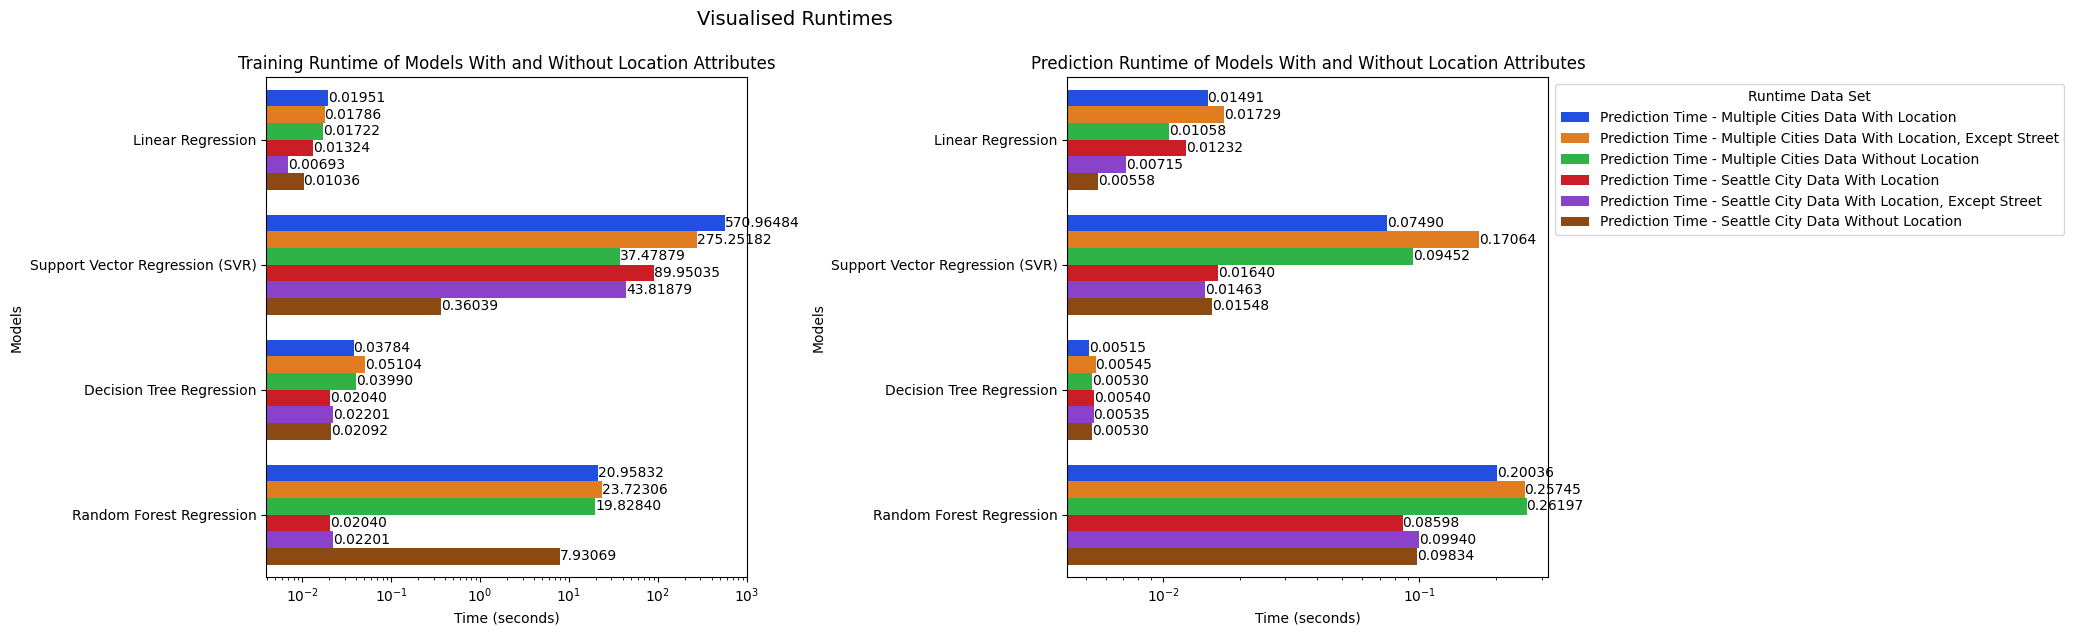

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting training time
sns.barplot(data=Training_Time_Df, x='Time_in_Seconds', y='Models', hue='Runtime_Data_Set', palette='bright', orient='h', ax=axes[0], legend=False)
axes[0].set_title('Training Runtime of Models With and Without Location Attributes')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Models')
axes[0].set_xscale('log')

# Adding time values next to the bars
for p in axes[0].patches:
    width = p.get_width()
    runtime = f'{width:.5f}'
    x = width
    y = p.get_y() + p.get_height() / 2
    axes[0].annotate(runtime, (x, y), ha='left', va='center')

# Plotting prediction time
sns.barplot(data=Prediction_Time_Df, x='Time_in_Seconds', y='Models', hue='Runtime_Data_Set', palette='bright', orient='h', ax=axes[1])
axes[1].set_title('Prediction Runtime of Models With and Without Location Attributes')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('Models')
axes[1].set_xscale('log')

# Adding time values next to the bars
for p in axes[1].patches:
    width = p.get_width()
    runtime = f'{width:.5f}'
    x = width
    y = p.get_y() + p.get_height() / 2
    axes[1].annotate(runtime, (x, y), ha='left', va='center')

plt.tight_layout()
plt.legend(title='Runtime Data Set', bbox_to_anchor=(1, 1), loc='upper left')
plt.suptitle('Visualised Runtimes',fontsize=14, y=1.05,)
plt.show()


# **Summary**

Based on the comparison of these metrics, it's clear that the model which includes location attributes performs better in all aspects. It shows lower MSE and a higher R2 Score, indicating that adding location information improves the model's ability to predict house prices accurately.

Therefore, it's safe to say that including location attributes significantly improves the model's predictive capability for house prices.